In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train[:10000]

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print('Training data:', x_train.shape)
print('Testing data:', x_test.shape)

Training data: (10000, 28, 28)
Testing data: (10000, 28, 28)


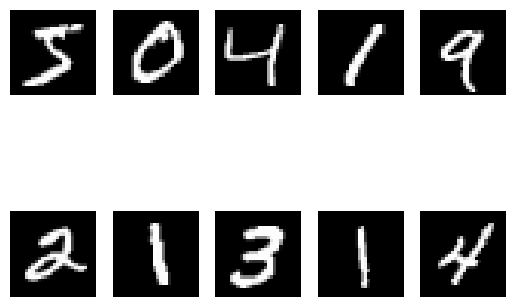

In [ ]:
for i in range (10):
  plt.subplot(2, 5, i + 1)
  # plt.title('Digit {}'.format(data[i]))
  plt.imshow(x_train[i], cmap='gray')
  # plt.subplots_adjust(hspace=3.0)
  plt.axis('off')
plt.show()

In [ ]:
# Adding a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print(x_train.shape)
print(x_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
model = tf.keras.Model(inputs, x)

In [ ]:
# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       7385

In [ ]:
# Training
model.fit(x_train, x_train, epochs=1, validation_data=(x_test, x_test))

313/313 [==============================] - 193s 610ms/step - loss: 0.0954 - accuracy: 0.8133 - val_loss: 0.1672 - val_accuracy: 0.8144


1/1 [==============================] - 0s 81ms/step


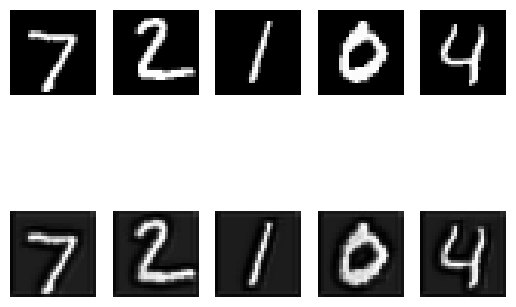

In [ ]:
import matplotlib.pyplot as plt

# Generating images from the test data
n = 5  # number of images to generate
test_images = x_test[:n]
generated_images = model.predict(test_images)

# Display the generated images
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
test_images.shape

(5, 28, 28, 1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       7385

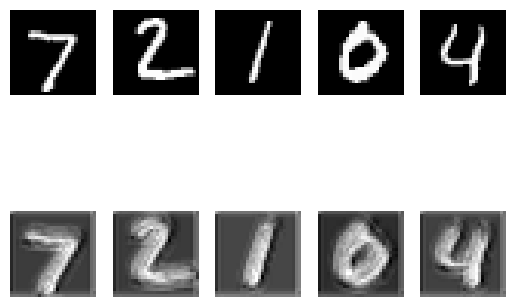

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train[:10000]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adding a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
output = layers.Conv2D(1, 3, activation='linear', padding='same')(x)  # Use linear activation for image generation
model = tf.keras.Model(inputs, output)

# Compiling
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

# Training
model.fit(x_train, x_train, epochs=1, validation_data=(x_test, x_test))

# Generating and displaying images
n = 5  # number of images to generate
test_images = x_test[:n]
generated_images = model.predict(test_images)

# Display the original and generated images
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_39 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_40 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 128)       738

1/1 [==============================] - 0s 113ms/step


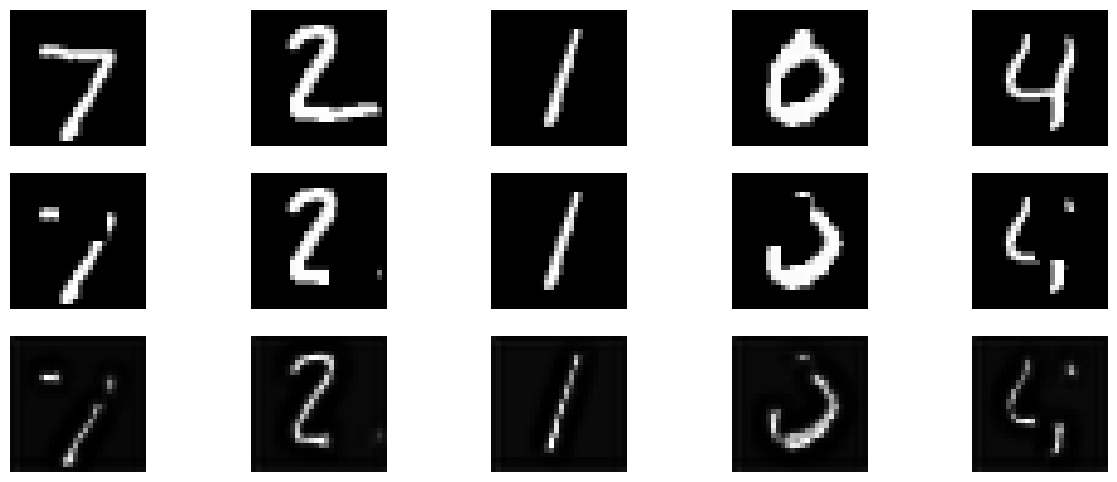

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train[:10000]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adding a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Generate partial images from complete images for training and testing
def generate_partial_images(images, window_size=10):
    partial_images = []
    for image in images:
        h, w, _ = image.shape
        start_h = np.random.randint(0, h - window_size)
        start_w = np.random.randint(0, w - window_size)
        partial_image = image.copy()
        partial_image[start_h:start_h+window_size, start_w:start_w+window_size] = 0
        partial_images.append(partial_image)
    return np.array(partial_images)

window_size = 10
partial_x_train = generate_partial_images(x_train, window_size)
partial_x_test = generate_partial_images(x_test, window_size)

# PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
output = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
model = tf.keras.Model(inputs, output)

# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Training on partial images
model.fit(partial_x_train, x_train, epochs=1)

# Generating and displaying images
n = 5  # number of images to generate
test_images = partial_x_test[:n]

# Display the original partial images and the actual test images
plt.figure(figsize=(15, 6))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + n +  1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')


# Generate and display the model's predictions for partial images
generated_images = model.predict(test_images)
for i in range(n):
    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data for the LSTM
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

# Define the PixelRNN model
model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.LSTM(64, return_sequences=True),
    layers.BatchNormalization(),
    layers.LSTM(64, return_sequences=True),
    layers.BatchNormalization(),
    layers.TimeDistributed(layers.Dense(28, activation='sigmoid'))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_images, epochs=10, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images[:5000], test_images[:5000])

print(f'Test accuracy: {test_acc}')

Epoch 1/10
1688/1688 [==============================] - 71s 40ms/step - loss: 0.1041 - accuracy: 0.3717 - val_loss: 0.0644 - val_accuracy: 0.4162
Epoch 2/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0638 - accuracy: 0.3751 - val_loss: 0.0632 - val_accuracy: 0.3912
Epoch 3/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0622 - accuracy: 0.3669 - val_loss: 0.0620 - val_accuracy: 0.3707
Epoch 4/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0612 - accuracy: 0.3693 - val_loss: 0.0613 - val_accuracy: 0.3868
Epoch 5/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0606 - accuracy: 0.3761 - val_loss: 0.0606 - val_accuracy: 0.3838
Epoch 6/10
1688/1688 [==============================] - 67s 39ms/step - loss: 0.0602 - accuracy: 0.3822 - val_loss: 0.0604 - val_accuracy: 0.3967
Epoch 7/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.0599 - accuracy: 0.3879 - val_loss: 0.0601 -

157/157 [==============================] - 3s 12ms/step


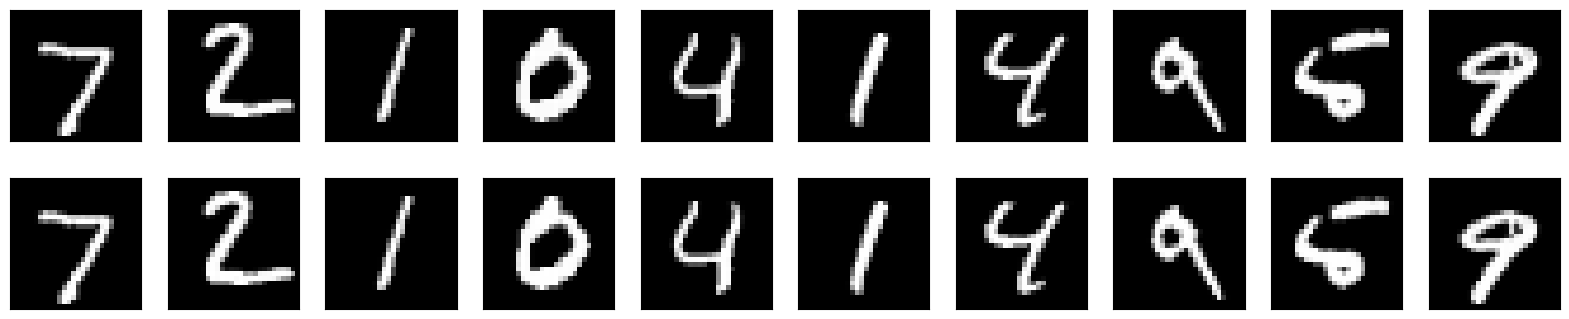

In [ ]:
import matplotlib.pyplot as plt

# Generate images from the test data
generated_images = model.predict(test_images[:5000])

# Plot the first n test images and their generated counterparts
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import numpy as np

# Generate images from the first row of the test data
first_rows = test_images[:5000, :1, :, :]
generated_images = np.zeros_like(test_images[:5000])
generated_images[:, :1, :, :] = first_rows

for i in range(1, 28):
    next_rows = model.predict(generated_images)
    generated_images[:, i:i+1, :, :] = next_rows[:, i:i+1, :, :]

# Now `generated_images` contains the images generated by the model


NameError: name 'test_images' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# Prepare the training data
train_images_partial = train_images[:, :1, :]
train_images_rest = train_images[:, 1:, :]

# Prepare the testing data
test_images_partial = test_images[:5000, :1, :]
test_images_rest = test_images[:5000, 1:, :]

# Define the PixelRNN model
model = tf.keras.Sequential([
    layers.Input(shape=(1, 28)),
    layers.LSTM(64, return_sequences=True),
    layers.BatchNormalization(),
    layers.LSTM(64, return_sequences=True),
    layers.BatchNormalization(),
    layers.TimeDistributed(layers.Dense(28, activation='sigmoid'))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(train_images_partial, train_images_rest, epochs=10, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_partial, test_images_rest)

print(f'Test accuracy: {test_acc}')

NameError: name 'train_images' is not defined

In [ ]:
model.summary()

Model: "pixel_rnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_1 (LSTMCell)      multiple                  66560     
                                                                 
 rnn_1 (RNN)                 multiple                  66560     
                                                                 
 dense_1 (Dense)             multiple                  33024     
                                                                 
Total params: 99584 (389.00 KB)
Trainable params: 99584 (389.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape to include channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the RowLSTM layer with masking
class RowLSTMCell(tf.keras.layers.LSTMCell):
    def __init__(self, units, **kwargs):
        super(RowLSTMCell, self).__init__(units, **kwargs)
        self.units = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units * 4),
                                      name='kernel',
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.recurrent_kernel = self.add_weight(shape=(self.units, self.units * 4),
                                                name='recurrent_kernel',
                                                initializer='orthogonal',
                                                trainable=True)
        self.bias = self.add_weight(shape=(self.units * 4,),
                                    name='bias',
                                    initializer='zeros',
                                    trainable=True)
        self.mask = tf.constant(1.0, shape=(1, 1, self.units))
        self.mask = tf.concat([self.mask[:, :, :self.units // 2], tf.constant(0.0, shape=(1, 1, self.units // 2))], axis=-1)

    def call(self, inputs, states):
        h_tm1 = states[0]  # previous hidden state
        mask = self.mask

        x_i, x_f, x_c, x_o = tf.split(tf.matmul(inputs, self.kernel) + self.bias, 4, axis=-1)
        h_tm1_i, h_tm1_f, h_tm1_c, h_tm1_o = tf.split(tf.matmul(h_tm1 * mask, self.recurrent_kernel), 4, axis=-1)

        i = tf.sigmoid(x_i + h_tm1_i)
        f = tf.sigmoid(x_f + h_tm1_f)
        c = f * h_tm1_c + i * tf.tanh(x_c)
        o = tf.sigmoid(x_o + h_tm1_o)

        h = o * tf.tanh(c)

        return h, [h]

# Define the RowLSTM layer using the masked cell
class RowLSTMCell(tf.keras.layers.LSTMCell):
    def __init__(self, units, **kwargs):
        super(RowLSTMCell, self).__init__(units, **kwargs)
        self.units = units

    def build(self, input_shape):
        super(RowLSTMCell, self).build(input_shape)
        self.mask = self.add_weight("mask", shape=(1, 1, self.units), initializer="ones", trainable=False)

    def call(self, inputs, states):
        # Implement masked LSTM cell as described in the paper
        # The mask prevents the cell from seeing the future pixels
        c, h = states

        # Use tf.where to apply the mask
        h = tf.where(self.mask == 1, h, tf.zeros_like(h))

        c, h = super(RowLSTMCell, self).call(inputs, [c, h])  # Call the base LSTM cell
        return c, h


class RowLSTM(layers.Layer):
    def __init__(self, units, **kwargs):
        super(RowLSTM, self).__init__(**kwargs)
        self.units = units
        self.cell = RowLSTMCell(units)

    def build(self, input_shape):
        self.cell.build((input_shape[0], input_shape[2] * input_shape[3]))  # Combine spatial dims

    def call(self, inputs):
        # Reshape inputs and apply masked LSTM cell to each row
        batch_size, height, width, channels = inputs.shape
        inputs = tf.reshape(inputs, (batch_size, height, width * channels))  # Correct the reshaping
        outputs = []
        for i in range(height):
            row = inputs[:, i, :]  # Get the i-th row
            output, _ = tf.keras.layers.RNN(self.cell, return_sequences=True, return_state=True)(row)  # Apply masked LSTM cell
            outputs.append(output)  # Append output to list
        outputs = tf.stack(outputs, axis=1)  # Stack outputs along height dimension
        outputs = tf.reshape(outputs, (batch_size, height, width, self.units))  # Reshape outputs to original shape
        return outputs

# Define the gated activation unit (implement based on your definition)
def gated_activation(inputs):
    # Split the inputs into two parts along the channel dimension
    inputs_1, inputs_2 = tf.split(inputs, 2, axis=-1)
    # Apply tanh to the first part and sigmoid to the second part
    inputs_1 = tf.tanh(inputs_1)
    inputs_2 = tf.sigmoid(inputs_2)
    # Element-wise multiply the two parts
    outputs = inputs_1 * inputs_2
    return outputs

# Define the PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(inputs)

# Assuming x has 128 channels initially
for _ in range(12):
    x = RowLSTM(128)(x)  # Use your implemented RowLSTM with masking


x = layers.Conv2D(1024, (1, 1), padding='same', activation=gated_activation)(x)
x = layers.Conv2D(1024, (1, 1), padding='same', activation=gated_activation)(x)
x = layers.Conv2D(768, (1, 1), padding='same', activation=gated_activation)(x)

# Add softmax outputs
outputs = []
for _ in range(3):
    outputs.append(layers.Softmax()(x))

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile and train the model (replace with your training parameters)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Predict on 10 test images (replace with your desired prediction logic)
predictions = model.predict(x_test[:10])

# Sample from the softmax distributions and generate images
samples = []
for i in range(3): # For each color channel
  # Sample from the softmax distributions over the pixel values
  samples.append(tf.random.categorical(tf.reshape(predictions[i], (-1, 256)), 1)) # Use the i-th softmax output

# Reshape the samples to match the original image shape
samples = tf.reshape(tf.concat(samples, axis=-1), (10, 28, 28, 3)) # Concatenate the color channels and reshape

# Convert the samples to RGB images
samples = tf.cast(samples, tf.float32) / 255.0 # Scale to [0, 1] range

# Visualize the generated images and the ground-truths
fig, axes = plt.subplots(2, 10, figsize=(20, 4)) # Create a figure with 2 rows and 10 columns of subplots
for i in range(10): # For each test image
  # Plot the generated image
  axes[0, i].imshow(samples[i]) # Use the i-th sample
  axes[0, i].set_title(f"Generated: {np.argmax(predictions[0][i])}") # Set the title as the predicted label
  axes[0, i].axis('off') # Hide the axes

  # Plot the ground-truth image
  axes[1, i].imshow(x_test[i, :, :, 0], cmap='gray') # Use the i-th test image
  axes[1, i].set_title(f"Ground-truth: {y_test[i]}") # Set the title as the true label
  axes[1, i].axis('off') # Hide the axes

plt.show() # Show the figure

TypeError: Exception encountered when calling layer "row_lstm_4" (type RowLSTM).

in user code:

    File "<ipython-input-5-107f2477f50b>", line 91, in call  *
        inputs = tf.reshape(inputs, (batch_size * height, width, channels))  # Correct the reshaping

    TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'


Call arguments received by layer "row_lstm_4" (type RowLSTM):
  • inputs=tf.Tensor(shape=(None, 28, 28, 128), dtype=float32)

### This one is giving some results (few pixels) but the approach is completely wrong and epochs are 10000

#### Trained and tested on single image

1/1 [==============================] - 0s 37ms/step


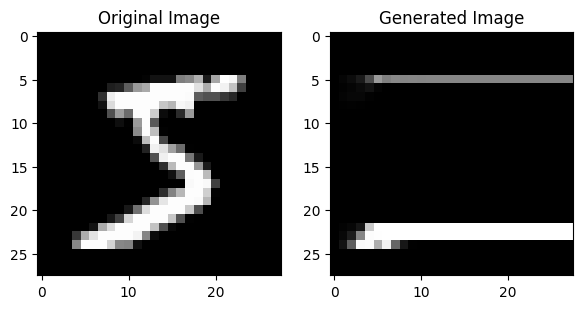

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Select the first image
x = x_train[0].reshape(28, 28, 1) / 255.0  # Normalize between 0 and 1

# Define the RowLSTM layer
class RowLSTM(layers.Layer):
    def __init__(self, units, **kwargs):
        super(RowLSTM, self).__init__(**kwargs)
        self.units = units
        self.lstm = layers.LSTM(units, return_sequences=True)

    def call(self, inputs):
        # Reshape input for LSTM (samples, rows, features)
        x = tf.transpose(inputs, perm=[1, 0, 2])
        # Apply LSTM row-wise
        x = self.lstm(x)
        # Reshape back to original (rows, samples, features)
        return tf.transpose(x, perm=[1, 0, 2])

# Define the PixelRNN model
class PixelRNN(keras.Model):
    def __init__(self, input_dim, hidden_dim):
        super(PixelRNN, self).__init__()
        self.lstm = RowLSTM(hidden_dim)
        self.dense = layers.Dense(input_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)
        return x

# Create the model with 128 hidden units
model = PixelRNN(1, 128)

# Define loss and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop (modify for multiple epochs if desired)
for epoch in range(10000):
    with tf.GradientTape() as tape:
        # Predict next pixel based on previous pixels
        predictions = model(x[:, :x.shape[1] - 1, :])
        # Calculate loss
        loss = loss_fn(x[:, 1:], predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Generate the image
generated_image = np.zeros_like(x)
generated_image[:, 0] = x[:, 0]  # Start with the first pixel

# Generate pixel by pixel
for i in range(1, x.shape[1]):
    predicted_pixel = model.predict(generated_image[:, :i])[:, -1, :].reshape(-1, 1)  # Add channel dimension
    generated_image[:, i] = predicted_pixel


# Plot the original and generated images
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(x.squeeze(), cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(generated_image.squeeze(), cmap="gray")
plt.title("Generated Image")
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 52ms/step


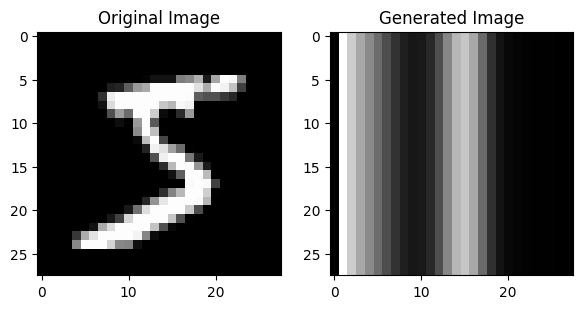

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Select the first image
x = x_train[0].reshape(28, 28, 1) / 255.0  # Normalize between 0 and 1

# Define a stacked LSTM layer
class StackedLSTM(layers.Layer):
    def __init__(self, units, num_layers, **kwargs):
        super(StackedLSTM, self).__init__(**kwargs)
        self.lstms = [layers.LSTM(units, return_sequences=True) for _ in range(num_layers)]

    def call(self, inputs):
        x = inputs
        for lstm in self.lstms:
            x = lstm(x)
        return x

# Define the PixelRNN model with stacked LSTMs
class PixelRNN(keras.Model):
    def __init__(self, input_dim, hidden_dim, num_lstm_layers=2):
        super(PixelRNN, self).__init__()
        self.lstm = StackedLSTM(hidden_dim, num_lstm_layers)
        self.dense = layers.Dense(input_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)
        return x

# Create the model with 128 hidden units and 2 stacked LSTMs
model = PixelRNN(1, 128, num_lstm_layers=2)

# Define loss and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop (modify for multiple epochs if desired)
for epoch in range(100):
    with tf.GradientTape() as tape:
        # Predict next pixel based on previous pixels
        predictions = model(x[:, :x.shape[1] - 1, :])
        # Calculate loss
        loss = loss_fn(x[:, 1:], predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Generate the image
generated_image = np.zeros_like(x)
generated_image[:, 0] = x[:, 0]  # Start with the first pixel

# Generate pixel by pixel
for i in range(1, x.shape[1]):
    predicted_pixel = model.predict(generated_image[:, :i])[:, -1, :].reshape(-1, 1)  # Add channel dimension
    generated_image[:, i] = predicted_pixel


# Plot the original and generated images
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(x.squeeze(), cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(generated_image.squeeze(), cmap="gray")
plt.title("Generated Image")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize between 0 and 1
x_train = x_train[y_train==5,:,:].reshape(-1, 28, 28, 1) / 255.0

x_test = x_test[y_test==5,:,:].reshape(-1, 28, 28, 1) / 255.0
x_train = x_test[:10]  # Select the first 10 testing images

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# RowLSTM layer
class RowLSTM(layers.Layer):
    def __init__(self, units, **kwargs):
        super(RowLSTM, self).__init__(**kwargs)
        self.units = units
        self.lstm = layers.LSTM(units, return_sequences=True)

    def call(self, inputs):
        x = tf.transpose(inputs, perm=[1, 0, 2])
        x = self.lstm(x)
        return tf.transpose(x, perm=[1, 0, 2])

In [ ]:
# PixelRNN model
class PixelRNN(keras.Model):
    def __init__(self, input_dim, hidden_dim):
        super(PixelRNN, self).__init__()
        self.lstm = RowLSTM(hidden_dim)
        self.dense = layers.Dense(input_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)
        return x

In [ ]:
# Model with 128 hidden units
model = PixelRNN(1, 128)

# Loss and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Training loop with 100 epochs
for epoch in range(100):
    for image in x_train:
        with tf.GradientTape() as tape:
            predictions = model(image[:, :image.shape[1] - 1, :])
            loss = loss_fn(image[:, 1:], predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

1/1 [==============================] - 0s 32ms/step


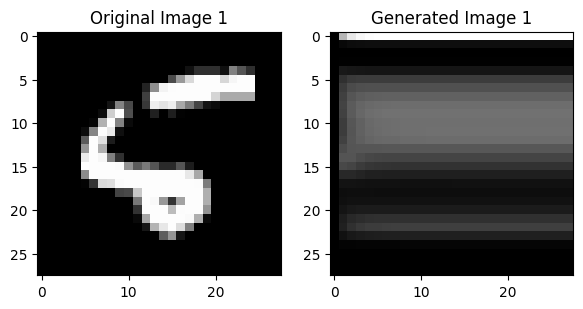

1/1 [==============================] - 0s 196ms/step


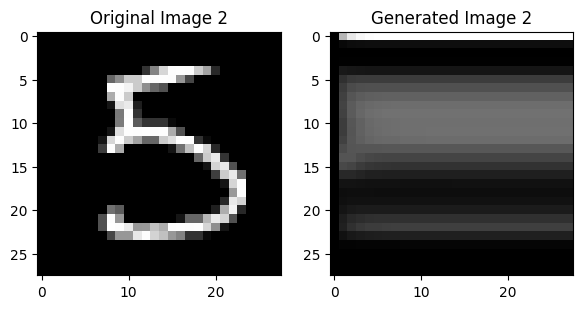

1/1 [==============================] - 0s 37ms/step


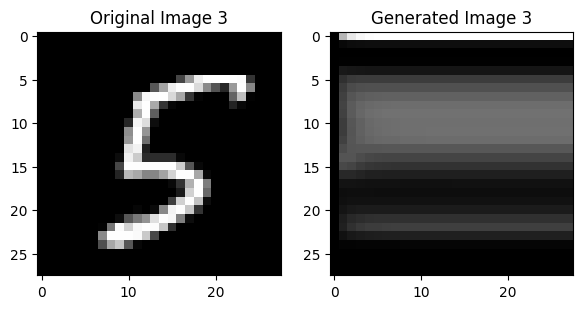

1/1 [==============================] - 0s 37ms/step


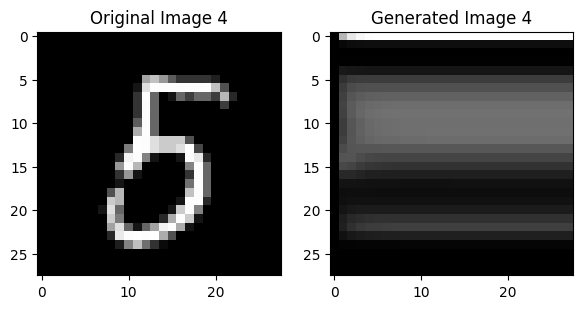

1/1 [==============================] - 0s 48ms/step


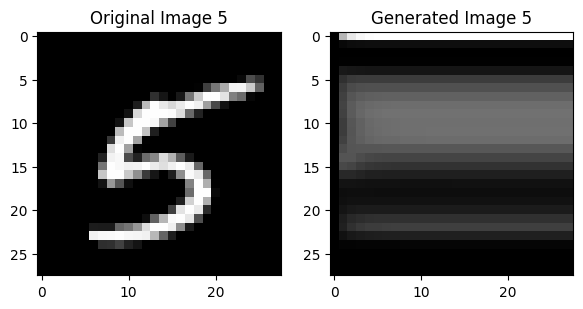

1/1 [==============================] - 0s 36ms/step


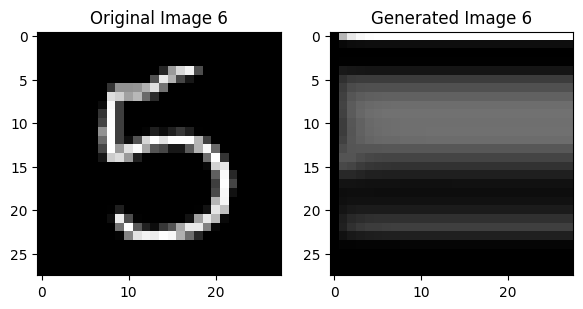

1/1 [==============================] - 0s 29ms/step


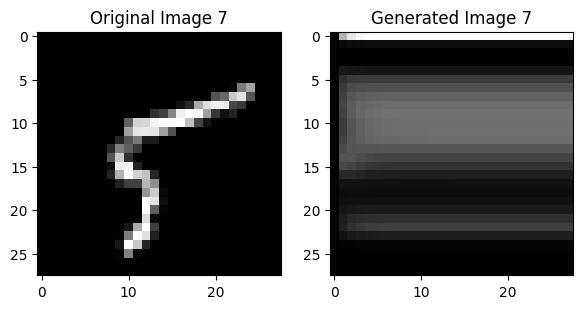

1/1 [==============================] - 0s 30ms/step


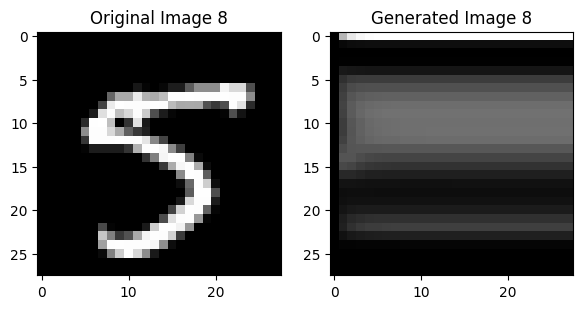

1/1 [==============================] - 0s 29ms/step


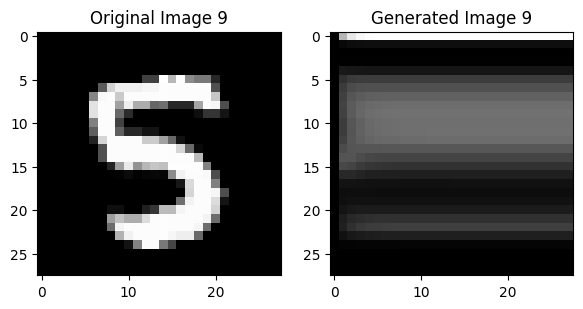

1/1 [==============================] - 0s 31ms/step


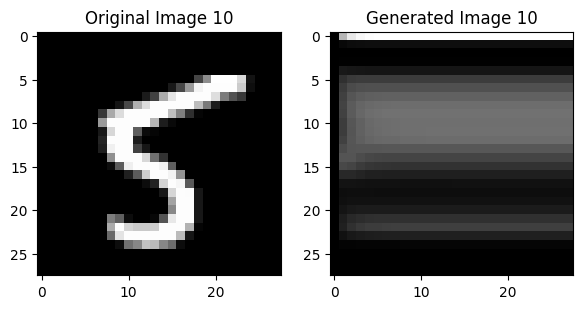

In [ ]:
# Generating pixel by pixel
for img_idx in range(10):
    generated_image = np.zeros_like(x_test[img_idx])
    generated_image[:, 0] = x_test[img_idx][:, 0]

    for i in range(1, x_test[img_idx].shape[1]):
        predicted_pixel = model.predict(generated_image[:, :i])[:, -1, :].reshape(-1, 1)
        generated_image[:, i] = predicted_pixel

    # Plotting original and generated images
    plt.figure(figsize=(6, 3))
    plt.subplot(121)
    plt.imshow(x_test[img_idx].squeeze(), cmap="gray")
    plt.title(f"Original Image {img_idx + 1}")
    plt.subplot(122)
    plt.imshow(generated_image.squeeze(), cmap="gray")
    plt.title(f"Generated Image {img_idx + 1}")
    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class DiagonalPixelLSTM(nn.Module):
    def __init__(self, channels_in, hidden_size):
        super(DiagonalPixelLSTM, self).__init__()
        self.channels_in = channels_in
        self.hidden_size = hidden_size
        self.conv_is = nn.Conv2d(channels_in, 5 * hidden_size, kernel_size=(1,1))
        self.conv_ss = nn.Conv1d(hidden_size, 5 * hidden_size, kernel_size=2, padding=1)

    def forward(self, features):
        input_map = skew(features)

        # Pre-compute input to state transform
        transformed_is = self.conv_is(input_map)

        h_states = []
        c_states = []

        previous_hidden_column = input_map.new_zeros([input_map.shape[0], self.hidden_size, input_map.shape[2]])
        previous_cell_column = input_map.new_zeros([input_map.shape[0], self.hidden_size, input_map.shape[2]])

        for i in range(input_map.shape[3]):
            input_column = input_map[..., i]

            # Compute gates
            transformed_ss = self.conv_ss(previous_hidden_column)[..., :-1]
            gates = transformed_is[..., i] + transformed_ss
            output_gate, forget_gate_left, forget_gate_up, input_gate, candidate_gate = torch.chunk(gates, 5, dim=1)
            output_gate, forget_gate_left, forget_gate_up, input_gate = F.sigmoid(output_gate), F.sigmoid(forget_gate_left), F.sigmoid(forget_gate_up), F.sigmoid(input_gate)
            candidate_gate = F.tanh(candidate_gate)

            previous_cell_column_shifted = torch.cat([input_column.new_zeros([input_column.shape[0], self.hidden_size, 1]), previous_cell_column], 2)[..., :-1]
            next_cell_column = (forget_gate_left * previous_cell_column + forget_gate_up * previous_cell_column_shifted) + input_gate * candidate_gate
            next_hidden_column = output_gate * F.tanh(next_cell_column)

            h_states.append(next_hidden_column)
            c_states.append(next_cell_column)

            previous_hidden_column = next_hidden_column
            previous_cell_column = next_cell_column

        total_h_states = unskew(torch.stack(h_states, dim=3))

        return total_h_states

def skew(tensor):
    # BCHW to BCH(H+W-1)
    output = tensor.new_zeros((tensor.shape[0], tensor.shape[1], tensor.shape[2], tensor.shape[2] + tensor.shape[3] - 1))
    for row in range(tensor.shape[2]):
        columns = (row, row + tensor.shape[3])
        output[:, :, row, columns[0]:columns[1]] = tensor[:, :, row]
    return output

def unskew(tensor):
    # BCH(H+W-1) to BCHW
    output = tensor.new_zeros((tensor.shape[0], tensor.shape[1], tensor.shape[2], tensor.shape[3] - tensor.shape[2] + 1))
    for row in range(tensor.shape[2]):
        columns = (row, row + output.shape[3])
        output[:, :, row] = tensor[:, :, row, columns[0]:columns[1]]
    return output

# neural network with DiagonalPixelLSTM
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pixel_lstm = DiagonalPixelLSTM(10, 50)
        self.pool = nn.MaxPool2d(kernel_size=28, stride=28)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pixel_lstm(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST("./MNIST", train=True, download=True, transform=transform)
test_set = datasets.MNIST("./MNIST", train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64)

# Model, optimizer, and loss function
model = SimpleNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Testing
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Testing accuracy
print(f"Test Accuracy: {100 * correct / total:.2f}%")

100%|██████████| 9912422/9912422 [00:00<00:00, 100466648.41it/s]


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27568432.82it/s]


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30594385.32it/s]


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9779532.22it/s]


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw

Epoch [1/1], Loss: 0.3388
Test Accuracy: 93.42%


In [ ]:
!pip install torchsummary
from torchsummary import summary

# Assuming the 'model' variable is already defined and trained
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Display model summary
summary(model, (1, 28, 28))  # Input size is (channels, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
              ReLU-2           [-1, 10, 28, 28]               0
            Conv2d-3          [-1, 250, 28, 55]           2,750
            Conv1d-4              [-1, 250, 29]          25,250
            Conv1d-5              [-1, 250, 29]          25,250
            Conv1d-6              [-1, 250, 29]          25,250
            Conv1d-7              [-1, 250, 29]          25,250
            Conv1d-8              [-1, 250, 29]          25,250
            Conv1d-9              [-1, 250, 29]          25,250
           Conv1d-10              [-1, 250, 29]          25,250
           Conv1d-11              [-1, 250, 29]          25,250
           Conv1d-12              [-1, 250, 29]          25,250
           Conv1d-13              [-1, 250, 29]          25,250
           Conv1d-14              [-1, 

In [ ]:
# Assuming the 'model' variable is already defined and trained

# Set the model to evaluation mode
model.eval()

# Create a DataLoader for the test set
test_loader = DataLoader(test_set, batch_size=1)

# Function to predict the class for an input image
def predict_image(image):
    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

# Test the model on some random images from the test set
for i, (image, label) in enumerate(test_loader):
    # Only show predictions for a few images
    if i < 5:
        prediction = predict_image(image)
        print(f"Actual Label: {label.item()}, Predicted Label: {prediction}")


Actual Label: 7, Predicted Label: 7
Actual Label: 2, Predicted Label: 2
Actual Label: 1, Predicted Label: 1
Actual Label: 0, Predicted Label: 0
Actual Label: 4, Predicted Label: 4


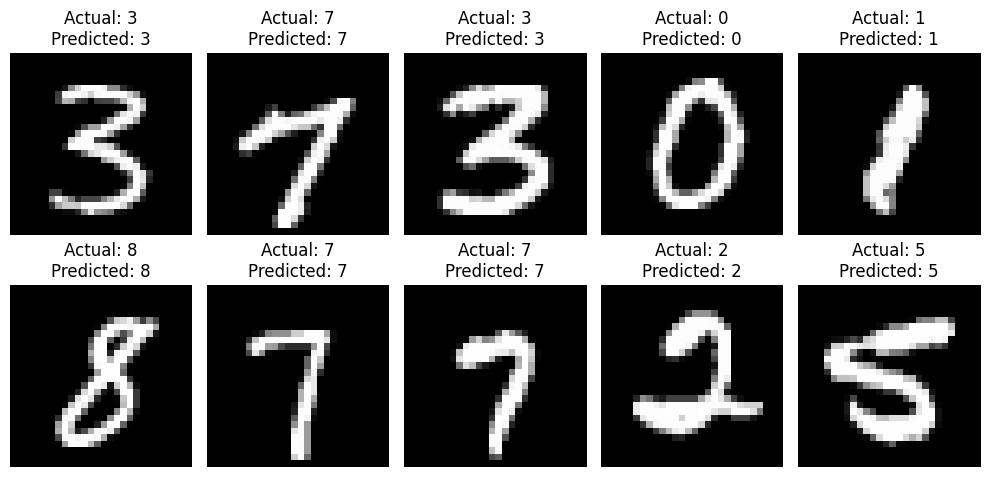

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Create a DataLoader for the test set
test_loader = DataLoader(test_set, batch_size=1, shuffle=True)

# Function to predict the class for an input image
def predict_image(image):
    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

# Predict labels for 10 images and plot them
num_images_to_predict = 10

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (image, label) in enumerate(test_loader):
    if i >= num_images_to_predict:
        break

    # Predict the label
    prediction = predict_image(image)

    # Convert the PyTorch tensor to a NumPy array and reshape
    img_np = np.squeeze(image.numpy())

    # Plot the image with the predicted label
    axes[i // 5, i % 5].imshow(img_np, cmap='gray')
    axes[i // 5, i % 5].set_title(f"Actual: {label.item()}\nPredicted: {prediction}")
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize between 0 and 1
x_train = x_train[y_train==5,:,:].reshape(-1, 28, 28, 1) / 255.0

x_test = x_test[y_test==5,:,:].reshape(-1, 28, 28, 1) / 255.0
x_train = x_test[:10]  # Select the first 10 testing images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the DiagonalPixelLSTM layer
class DiagonalPixelLSTM(layers.Layer):

    def __init__(self, units, **kwargs):
        super(DiagonalPixelLSTM, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], 4 * self.units),
                                      initializer='glorot_uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(shape=(self.units, 4 * self.units),
                                                initializer='orthogonal',
                                                name='recurrent_kernel')
        self.bias = self.add_weight(shape=(4 * self.units,),
                                    initializer='zeros',
                                    name='bias')
        super(DiagonalPixelLSTM, self).build(input_shape)

    def call(self, inputs, states=None):
        if states is None:
            batch_size = tf.shape(inputs)[0]
            initial_state = tf.zeros([batch_size, self.units])
        else:
            initial_state = states[0]

        h_tm1 = initial_state
        x_i = tf.matmul(inputs, self.kernel[:, :self.units]) + self.bias[:self.units]
        x_f = tf.matmul(inputs, self.kernel[:, self.units:2 * self.units]) + self.bias[self.units:2 * self.units]
        x_c = tf.matmul(inputs, self.kernel[:, 2 * self.units:3 * self.units]) + self.bias[2 * self.units:3 * self.units]
        x_o = tf.matmul(inputs, self.kernel[:, 3 * self.units:]) + self.bias[3 * self.units:]

        h_i = tf.matmul(h_tm1, self.recurrent_kernel[:, :self.units])
        h_f = tf.matmul(h_tm1, self.recurrent_kernel[:, self.units:2 * self.units])
        h_c = tf.matmul(h_tm1, self.recurrent_kernel[:, 2 * self.units:3 * self.units])
        h_o = tf.matmul(h_tm1, self.recurrent_kernel[:, 3 * self.units:])

        i = tf.sigmoid(x_i + h_i)
        f = tf.sigmoid(x_f + h_f)
        c = f * h_tm1 + i * tf.tanh(x_c + h_c)
        o = tf.sigmoid(x_o + h_o)

        h = o * tf.tanh(c)
        return tf.stack([h, h], axis=-1), [h]

    def get_config(self):
        config = super(DiagonalPixelLSTM, self).get_config()
        config.update({'units': self.units})
        return config

# Build the model using the functional API
inputs = keras.Input(shape=(28, 28, 1))

# Add Conv2D layers using a loop with padding
x = inputs
for _ in range(40):
    x = layers.Conv2D(250, (3, 3), activation='relu', padding='same')(x)

x = layers.Reshape((28, 28 * 250))(x)
x, _ = DiagonalPixelLSTM(50)(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_308 (Conv2D)         (None, 28, 28, 250)       2500      
                                                                 
 conv2d_309 (Conv2D)         (None, 28, 28, 250)       562750    
                                                                 
 conv2d_310 (Conv2D)         (None, 28, 28, 250)       562750    
                                                                 
 conv2d_311 (Conv2D)         (None, 28, 28, 250)       562750    
                                                                 
 conv2d_312 (Conv2D)         (None, 28, 28, 250)       562750    
                                                                 
 conv2d_313 (Conv2D)         (None, 28, 28, 250)       5627

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

# Generate augmented training data
augmented_train_data = datagen.flow(x_train, batch_size=len(x_train), shuffle=False)
augmented_x_train = next(augmented_train_data)[0]

# Create occluded test images
occluded_test_images = x_test[:10].copy()
occluded_test_images[:, 14:, :] = 0  # Occlude the bottom half of the images

# Define the PixelRNN model
model = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model with augmented data
model.fit(augmented_x_train, augmented_x_train, epochs=1000, batch_size=128, validation_data=(x_test, x_test))



Epoch 1/1000
1/1 [==============================] - 51s 51s/step - loss: 0.6933 - val_loss: 0.6898
Epoch 2/1000
1/1 [==============================] - 82s 82s/step - loss: 0.6905 - val_loss: 0.6867
Epoch 3/1000
1/1 [==============================] - 49s 49s/step - loss: 0.6876 - val_loss: 0.6833
Epoch 4/1000
1/1 [==============================] - 82s 82s/step - loss: 0.6844 - val_loss: 0.6797
Epoch 5/1000
1/1 [==============================] - 53s 53s/step - loss: 0.6808 - val_loss: 0.6755
Epoch 6/1000
1/1 [==============================] - 50s 50s/step - loss: 0.6768 - val_loss: 0.6707
Epoch 7/1000
1/1 [==============================] - 51s 51s/step - loss: 0.6721 - val_loss: 0.6654
Epoch 8/1000
1/1 [==============================] - 50s 50s/step - loss: 0.6668 - val_loss: 0.6591
Epoch 9/1000
1/1 [==============================] - 49s 49s/step - loss: 0.6608 - val_loss: 0.6521
Epoch 10/1000
1/1 [==============================] - 49s 49s/step - loss: 0.6540 - val_loss: 0.6444
Epoch 11/

KeyboardInterrupt: 

1/1 [==============================] - 0s 204ms/step


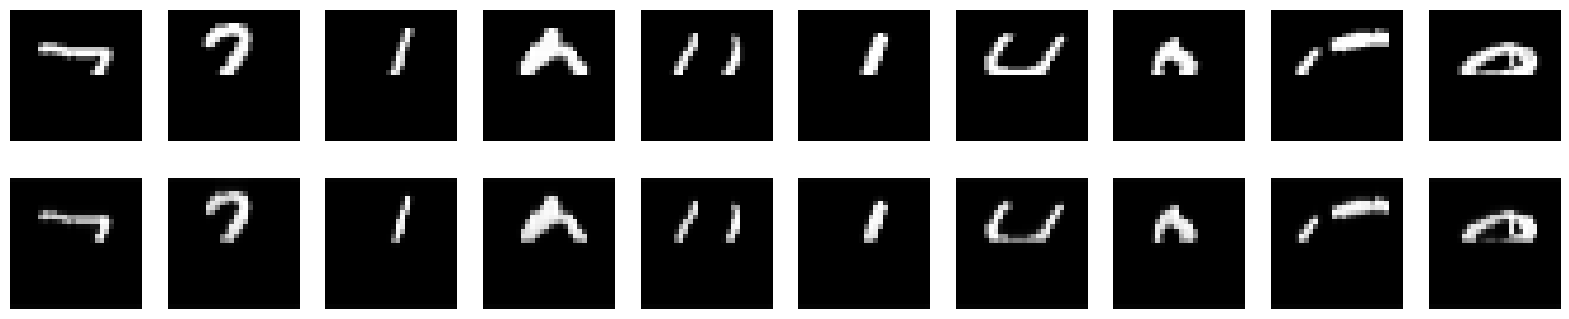

In [ ]:
# Generate complete images from the occluded test images
generated_images = model.predict(occluded_test_images)

# Plot the occluded test images and the generated images
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axes[0, i].imshow(occluded_test_images[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()

Epoch 1/5
1688/1688 [==============================] - 2054s 1s/step - loss: 0.0876 - val_loss: 0.0669
Epoch 2/5
1688/1688 [==============================] - 2043s 1s/step - loss: 0.0663 - val_loss: 0.0665
Epoch 3/5
1688/1688 [==============================] - 1976s 1s/step - loss: 0.0661 - val_loss: 0.0662
Epoch 4/5
1688/1688 [==============================] - 2010s 1s/step - loss: 0.0660 - val_loss: 0.0662
Epoch 5/5
1/1 [==============================] - 1s 875ms/step


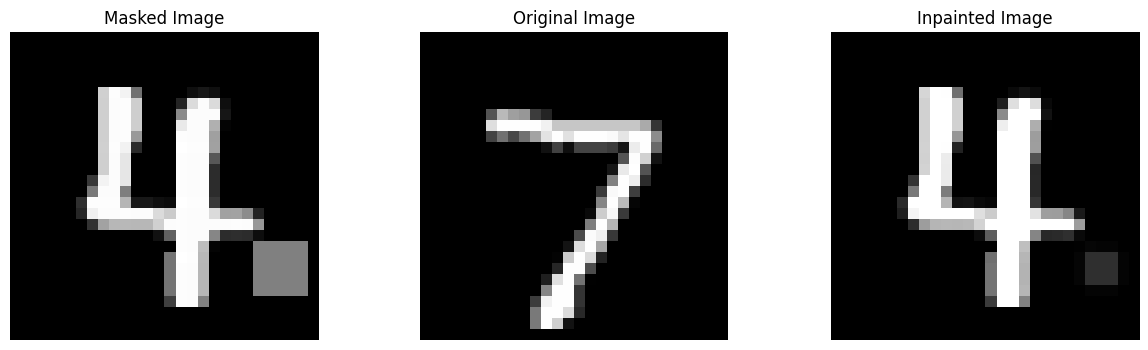

1/1 [==============================] - 0s 32ms/step


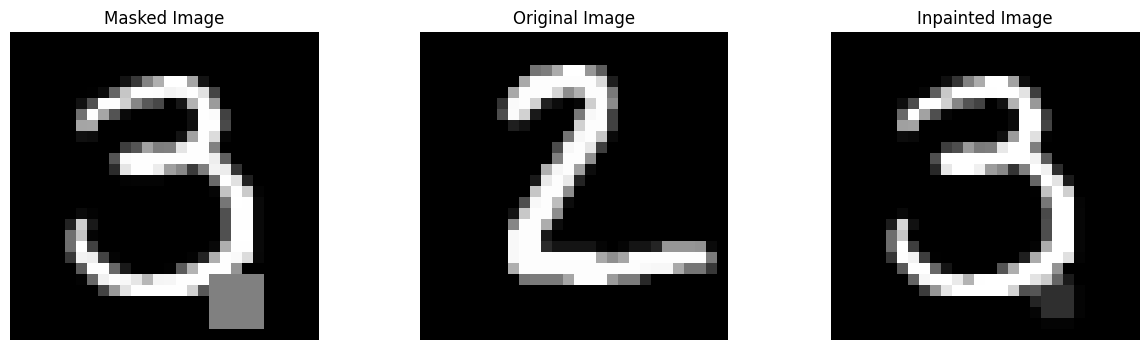

1/1 [==============================] - 0s 30ms/step


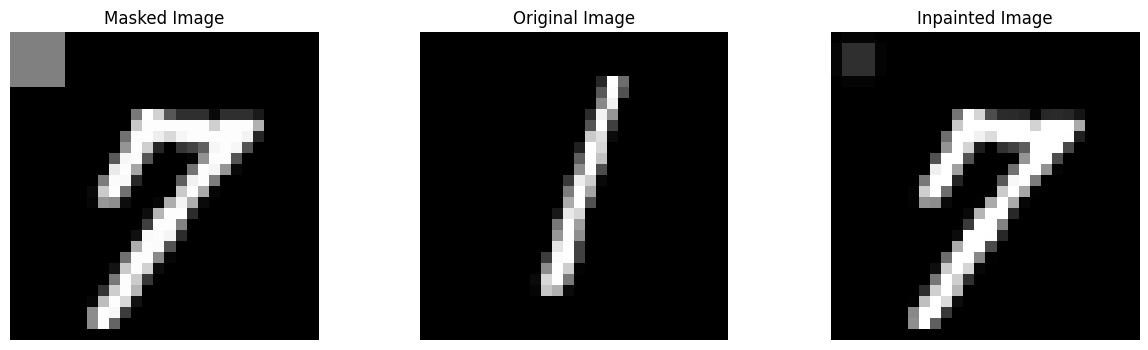

1/1 [==============================] - 0s 29ms/step


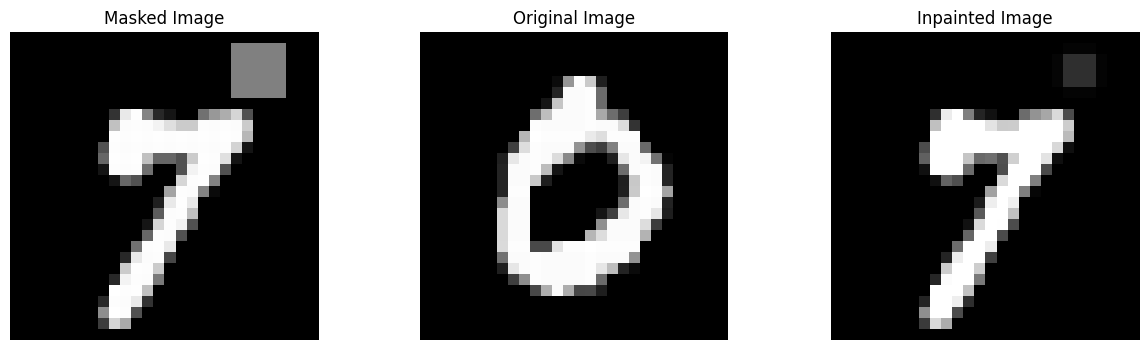

1/1 [==============================] - 0s 31ms/step


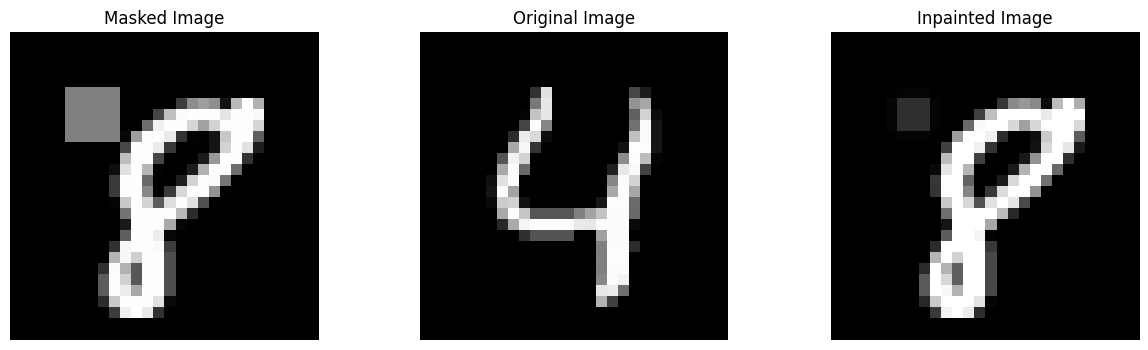

1/1 [==============================] - 0s 31ms/step


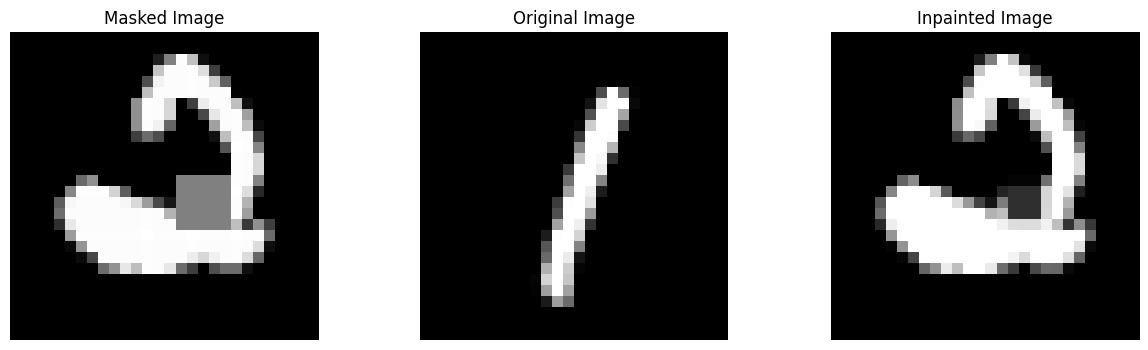

1/1 [==============================] - 0s 28ms/step


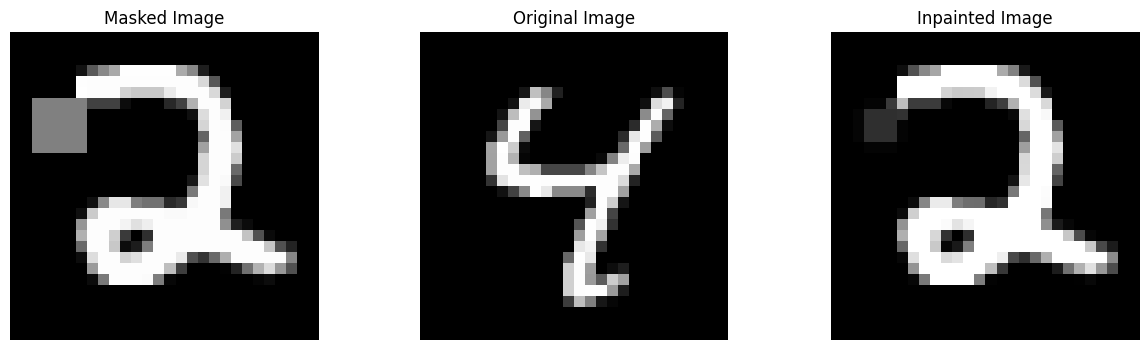

1/1 [==============================] - 0s 29ms/step


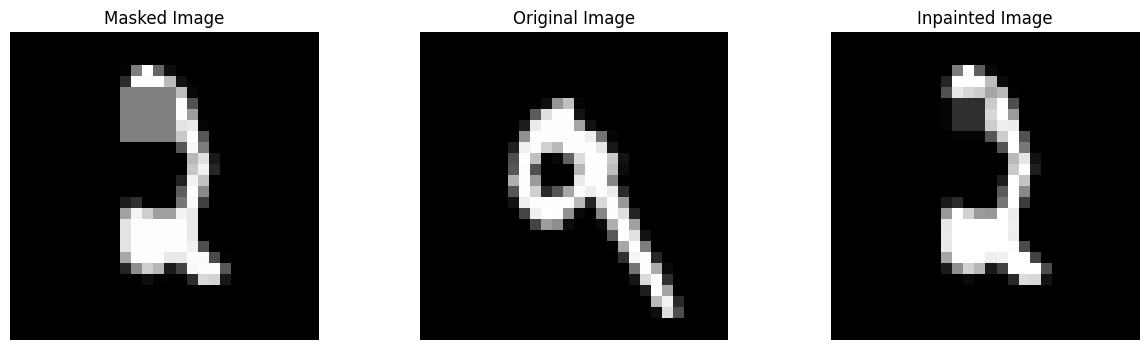

1/1 [==============================] - 0s 29ms/step


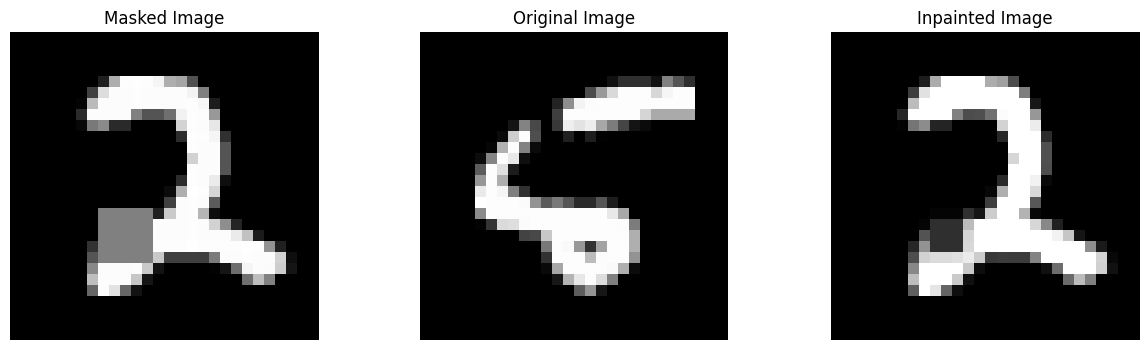

1/1 [==============================] - 0s 31ms/step


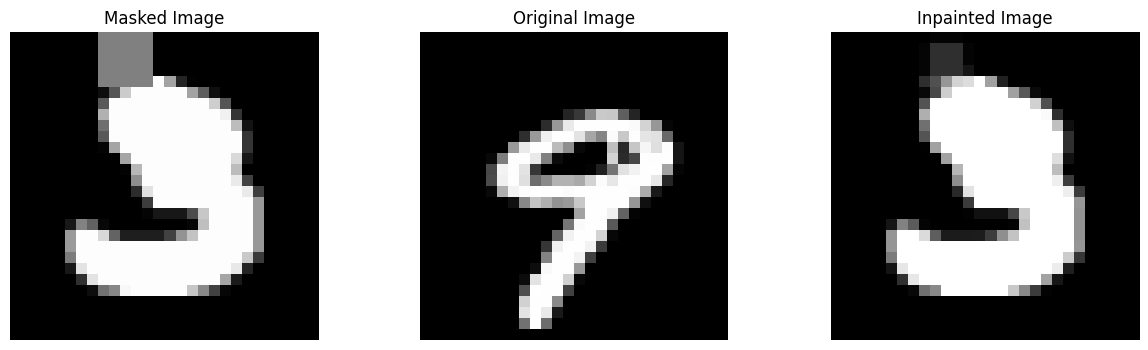

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to include a channel dimension (required for CNNs)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Function to add random masks to images
def add_random_mask(images, mask_size=(5, 5)):
    masked_images = images.copy()
    for img in masked_images:
        h, w = img.shape[:2]
        mask_h, mask_w = mask_size
        start_h = np.random.randint(0, h - mask_h)
        start_w = np.random.randint(0, w - mask_w)
        img[start_h:start_h+mask_h, start_w:start_w+mask_w] = 0.5  # Placeholder for the masked area
    return masked_images

# Add masks to the training and test images
x_train_masked = add_random_mask(x_train)
x_test_masked = add_random_mask(x_test)

# Define the PixelRNN model architecture
def create_pixel_rnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))

    # Add multiple 1x1 convolutional layers using a loop
    for _ in range(50):  # You can adjust the number of layers as needed
        model.add(layers.Conv2D(64, (1, 1), activation='relu', padding='same'))

    # Final convolutional layer to generate the image
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    return model

# Create the PixelRNN model
pixel_rnn_model = create_pixel_rnn((28, 28, 1))

# Compile the model
pixel_rnn_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on the masked images
pixel_rnn_model.fit(x_train_masked, x_train, epochs=5, batch_size=32, validation_split=0.1)

# Test the model on 10 images
for i in range(10):
    # Select a random test image
    test_image = x_test_masked[np.random.randint(0, x_test.shape[0])]
    test_image = test_image.reshape((1, 28, 28, 1))

    # Generate the inpainted image
    inpainted_image = pixel_rnn_model.predict(test_image)

    # Display the original, masked, and inpainted images
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    plt.title('Masked Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(inpainted_image.reshape(28, 28), cmap='gray')
    plt.title('Inpainted Image')
    plt.axis('off')

    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to include a channel dimension -> (required for CNNs)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Function to add random masks to images
def add_random_mask(images, mask_size=(14, 14)):
    masked_images = images.copy()
    for img in masked_images:
        h, w = img.shape[:2]
        mask_h, mask_w = mask_size
        start_h = np.random.randint(0, h - mask_h)
        start_w = np.random.randint(0, w - mask_w)
        img[start_h:start_h+mask_h, start_w:start_w+mask_w] = 0.5  # Placeholder for the masked area
    return masked_images

# Masks to training and test images
x_train_masked = add_random_mask(x_train)
x_test_masked = add_random_mask(x_test)

# PixelRNN model architecture
def create_pixel_rnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))

    # Multiple 1x1 convolutional layers
    for _ in range(50):
        model.add(layers.Conv2D(64, (1, 1), activation='relu', padding='same'))

    # Final convolutional layer to generate the image
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    return model

# PixelRNN model
pixel_rnn_model = create_pixel_rnn((28, 28, 1))

# Compile the model
pixel_rnn_model.compile(optimizer='adam', loss='binary_crossentropy')

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
%%time
# Train the model on masked images
pixel_rnn_model.fit(x_train_masked, x_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 1831s 1s/step - loss: 0.2627 - val_loss: 0.1563
Epoch 2/10
1688/1688 [==============================] - 1813s 1s/step - loss: 0.1563 - val_loss: 0.1551
Epoch 3/10
1688/1688 [==============================] - 1817s 1s/step - loss: 0.1561 - val_loss: 0.1612
Epoch 4/10
1688/1688 [==============================] - 1817s 1s/step - loss: 0.1558 - val_loss: 0.1546
Epoch 5/10
1688/1688 [==============================] - 1821s 1s/step - loss: 0.1554 - val_loss: 0.1545
Epoch 6/10
1688/1688 [==============================] - 1788s 1s/step - loss: 0.1551 - val_loss: 0.1541
Epoch 7/10
1688/1688 [==============================] - 1800s 1s/step - loss: 0.1563 - val_loss: 0.1554
Epoch 8/10
1688/1688 [==============================] - 1833s 1s/step - loss: 0.1551 - val_loss: 0.1541
Epoch 9/10
1688/1688 [==============================] - 1783s 1s/step - loss: 0.1547 - val_loss: 0.1539
Epoch 10/10
1688/1688 [==============================] - 1786s 1

1/1 [==============================] - 1s 702ms/step


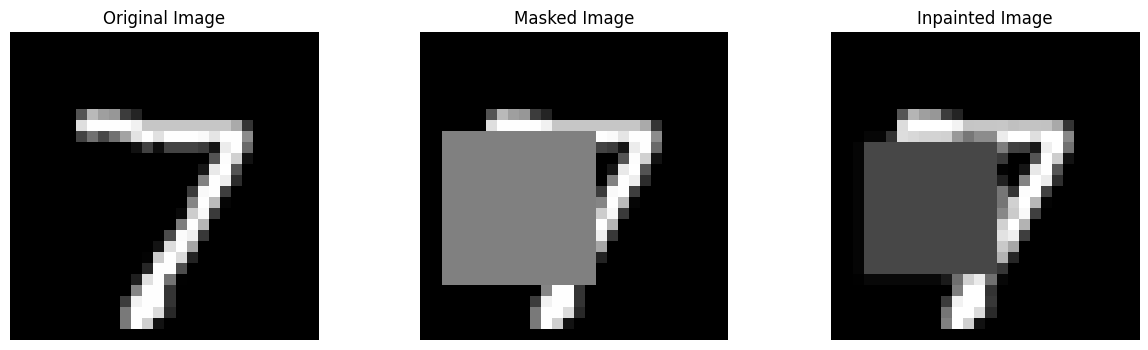

1/1 [==============================] - 0s 48ms/step


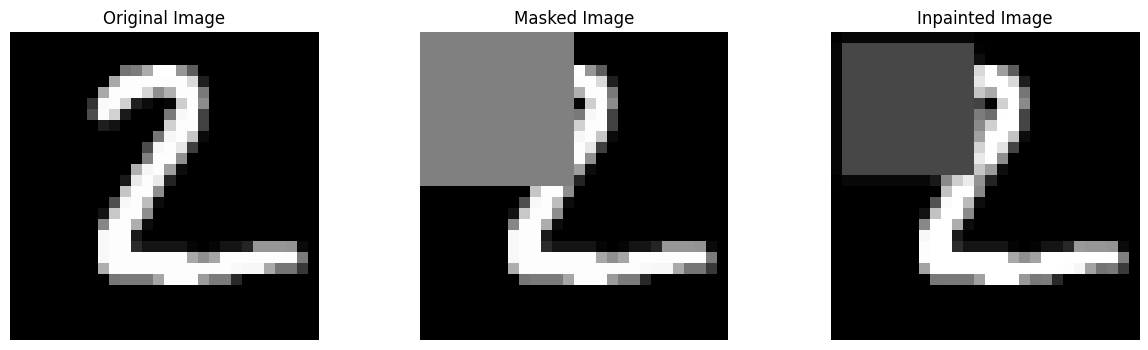

1/1 [==============================] - 0s 42ms/step


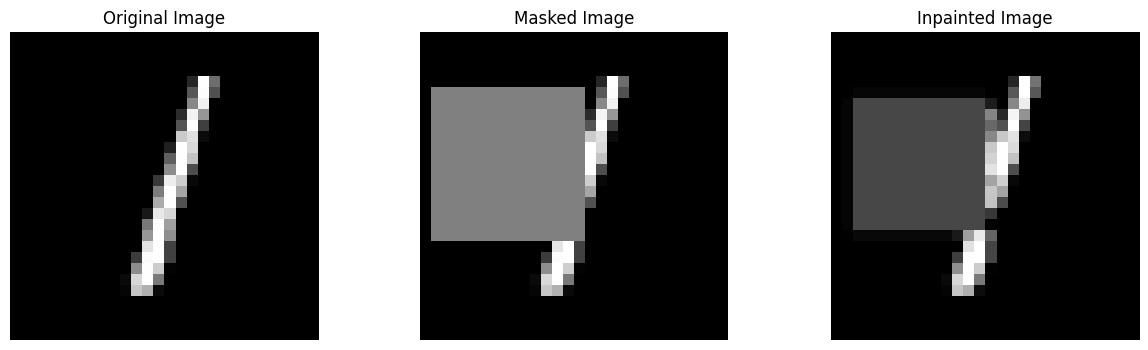

1/1 [==============================] - 0s 28ms/step


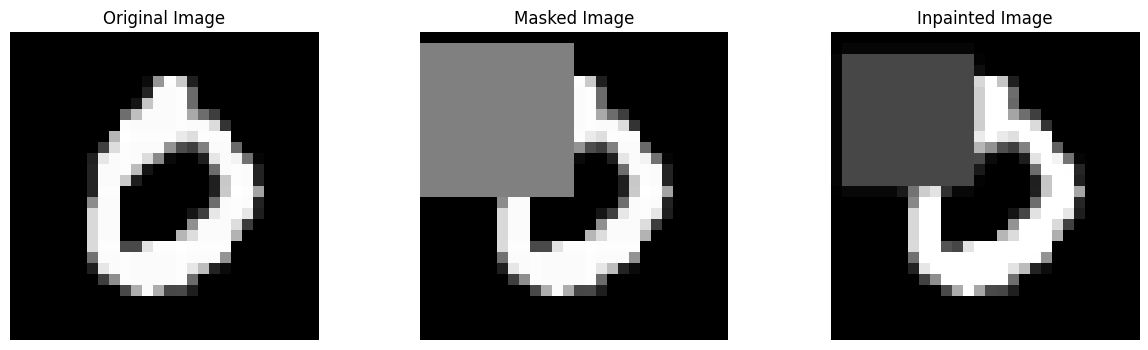

1/1 [==============================] - 0s 28ms/step


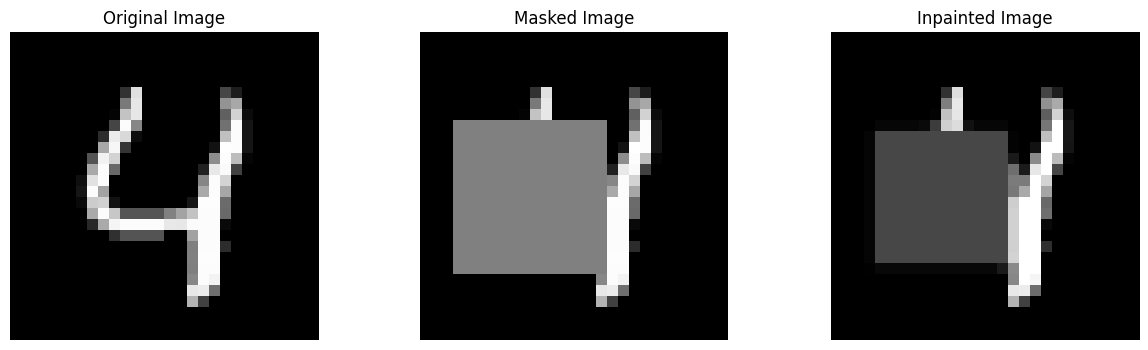

1/1 [==============================] - 0s 28ms/step


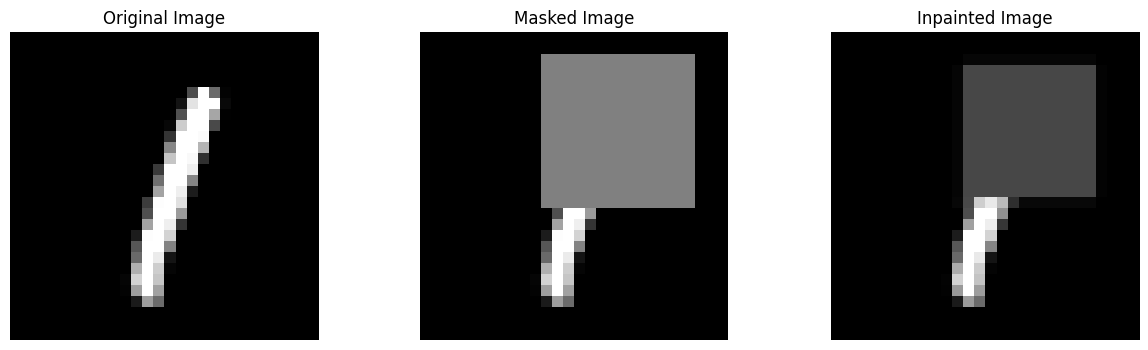

1/1 [==============================] - 0s 27ms/step


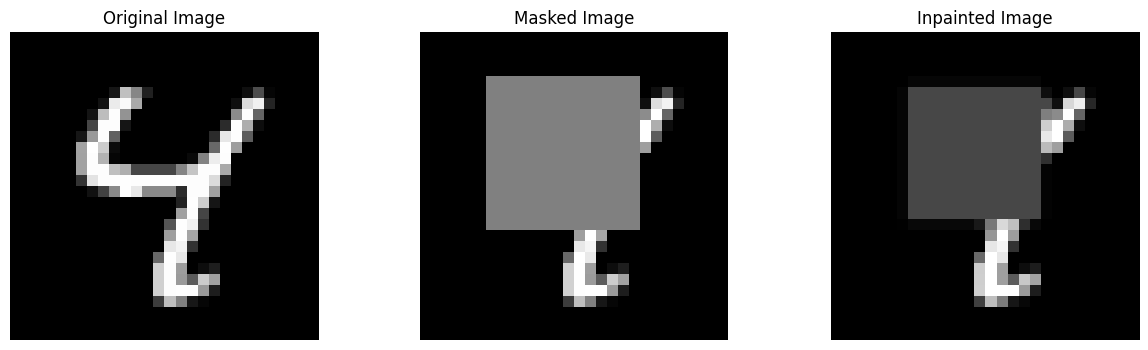

1/1 [==============================] - 0s 29ms/step


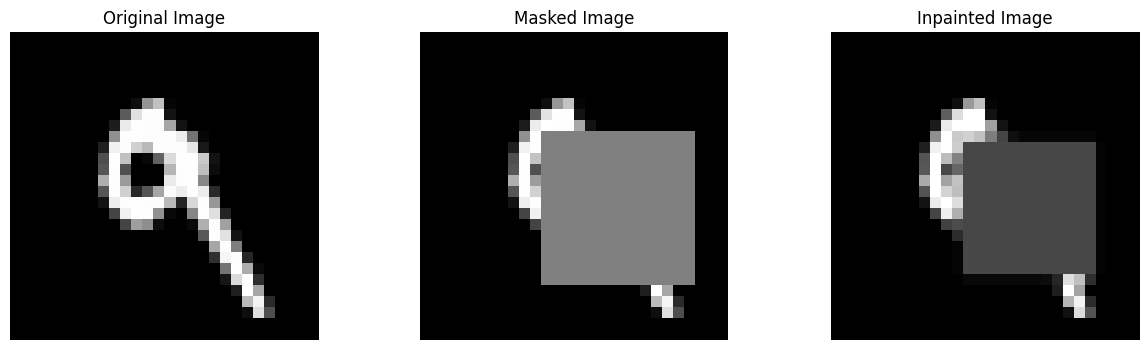

1/1 [==============================] - 0s 27ms/step


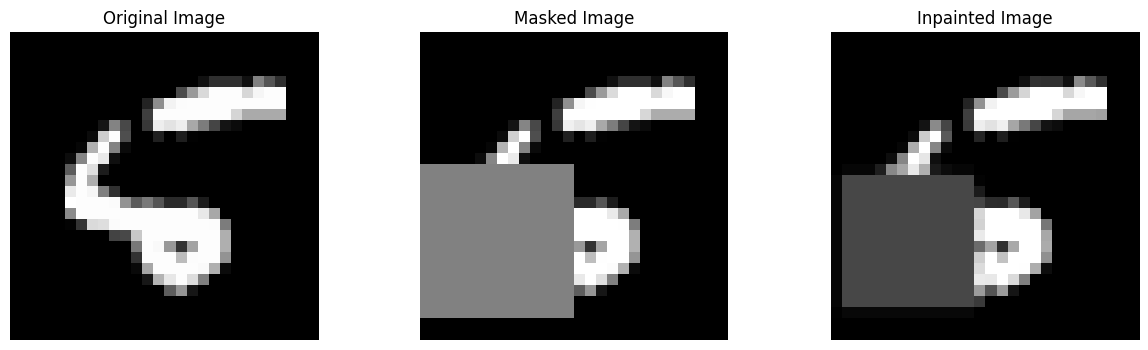

1/1 [==============================] - 0s 35ms/step


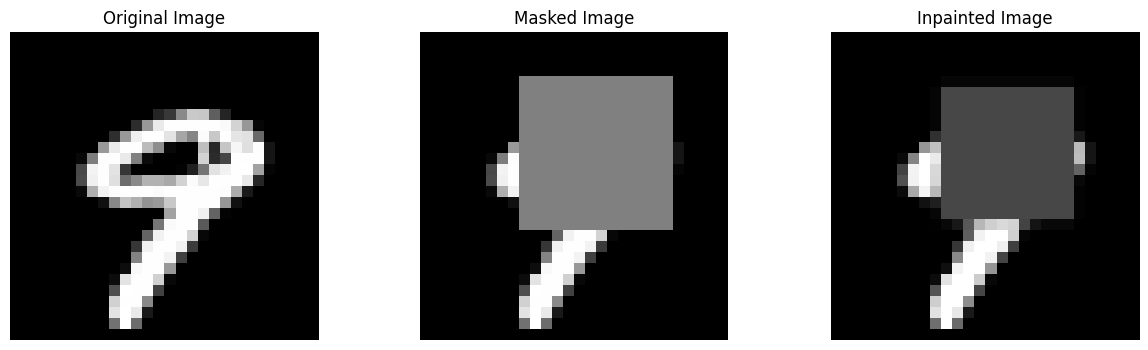

In [ ]:
# Test the model 10 images
for i in range(10):
    test_image = x_test_masked[i]
    test_image = test_image.reshape((1, 28, 28, 1))

    # Generate inpainted image
    inpainted_image = pixel_rnn_model.predict(test_image)

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    plt.title('Masked Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(inpainted_image.reshape(28, 28), cmap='gray')
    plt.title('Inpainted Image')
    plt.axis('off')

    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class DiagonalLSTM(layers.Layer):
    def __init__(self, units, **kwargs):
        super(DiagonalLSTM, self).__init__(**kwargs)
        self.units = units
        self.lstm_cells = [layers.LSTMCell(units) for _ in range(28)]

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        h = [tf.zeros((batch_size, self.units), dtype=inputs.dtype) for _ in range(28)]
        c = [tf.zeros((batch_size, self.units), dtype=inputs.dtype) for _ in range(28)]

        outputs = []
        for i in range(28):
            h[i], c[i] = self.lstm_cells[i](inputs[:, :, i], states=[h[i], c[i]])
            outputs.append(h[i])

        outputs = tf.stack(outputs, axis=2)
        return outputs

def PixelRNN():
    model = models.Sequential([
        layers.Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(250, kernel_size=(1, 1), activation='relu'),
        layers.Reshape((26*26, 250)),  # Reshape to 3D tensor
        *[layers.Conv1D(250, kernel_size=1, activation='relu') for _ in range(58)],
        DiagonalLSTM(50),
        layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),  # Add a channel dimension
        layers.MaxPool2D(pool_size=(28, 28)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Instantiate the model
model = PixelRNN()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 250)       2750      
                                                                 
 reshape_5 (Reshape)         (None, 676, 250)          0         
                                                                 
 conv1d_176 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_177 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_178 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_179 (Conv1D)         (None, 676, 250)        

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class DiagonalLSTM(layers.Layer):
    def __init__(self, hidden_size, **kwargs):
        super(DiagonalLSTM, self).__init__(**kwargs)
        self.hidden_size = hidden_size
        self.conv_is = layers.Conv2D(5 * hidden_size, kernel_size=1, padding='same')
        self.conv_ss = layers.Conv1D(5 * hidden_size, kernel_size=2, padding='same')

    def build(self, input_shape):
        self.batch_size, self.height, self.width, self.channels = input_shape
        super(DiagonalLSTM, self).build(input_shape)

    def call(self, inputs):
        # Pre-compute input to state transform
        transformed_is = self.conv_is(inputs)

        h_states = []
        c_states = []

        previous_hidden_column = tf.zeros((self.batch_size, self.hidden_size, 1))
        previous_cell_column = tf.zeros((self.batch_size, self.hidden_size, 1))

        for i in range(self.width):
            input_column = inputs[:, :, i, :]
            input_column = tf.expand_dims(input_column, axis=2)

            # Compute gates
            transformed_ss = self.conv_ss(previous_hidden_column)
            transformed_ss = tf.squeeze(transformed_ss, axis=2)
            gates = transformed_is[:, :, i, :] + transformed_ss
            output_gate, forget_gate, input_gate, candidate_gate = tf.split(gates, 4, axis=-1)
            output_gate = tf.sigmoid(output_gate)
            forget_gate = tf.sigmoid(forget_gate)
            input_gate = tf.sigmoid(input_gate)
            candidate_gate = tf.tanh(candidate_gate)

            next_cell_column = forget_gate * previous_cell_column + input_gate * candidate_gate
            next_hidden_column = output_gate * tf.tanh(next_cell_column)

            h_states.append(next_hidden_column)
            c_states.append(next_cell_column)

            previous_hidden_column = next_hidden_column
            previous_cell_column = next_cell_column

        total_h_states = tf.stack(h_states, axis=2)
        return total_h_states

def PixelRNN():
    model = models.Sequential([
        layers.Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(250, kernel_size=(1, 1), activation='relu'),
        layers.Reshape((26*26, 250)),  # Reshape to 3D tensor
        *[layers.Conv1D(250, kernel_size=1, activation='relu') for _ in range(58)],
        layers.LSTM(50, return_sequences=True),  # Use standard LSTM layer
        layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),  # Add a channel dimension
        layers.MaxPool2D(pool_size=(28, 28)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Instantiate the model
model = PixelRNN()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 250)       2750      
                                                                 
 reshape_8 (Reshape)         (None, 676, 250)          0         
                                                                 
 conv1d_353 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_354 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_355 (Conv1D)         (None, 676, 250)          62750     
                                                                 
 conv1d_356 (Conv1D)         (None, 676, 250)        

## PixelRNN as Paper

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Reshape the data to fit the CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
%%time

# Define the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())  # Flatten the output of the CNN

# Define the RNN model
rnn_model = models.Sequential()
rnn_model.add(layers.SimpleRNN(128, return_sequences=True, input_shape=(None, 576)))  # Assuming 576 features from the CNN
rnn_model.add(layers.SimpleRNN(128, return_sequences=True))
rnn_model.add(layers.SimpleRNN(128))
rnn_model.add(layers.Dense(10, activation='softmax'))

# Combine the two models
model = models.Sequential()
model.add(cnn_model)
model.add(layers.Reshape((1, 576)))  # Reshape the CNN output to have a single time step
model.add(rnn_model)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 75s 36ms/step - loss: 0.1292 - accuracy: 0.9599 - val_loss: 0.0446 - val_accuracy: 0.9856
Epoch 2/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 3/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0680 - val_accuracy: 0.9811
Epoch 4/100
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0332 - val_accuracy: 0.9911
Epoch 5/100
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0286 - val_accuracy: 0.9915
Epoch 6/100
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0333 - val_accuracy: 0.9911
Epoch 7/100
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0

In [ ]:
'''
1. Prepare MNIST dataset
2. Create a Row-wise LSTM network
3. Compile and fit the model
4. Visualize the learned dependencies
5. Generate complete images from occluded images
6. Test on 10 images
'''

'\n1. Prepare MNIST dataset\n2. Create a Row-wise LSTM network\n3. Compile and fit the model\n4. Visualize the learned dependencies\n5. Generate complete images from occluded images\n6. Test on 10 images\n'

# Session Crashes

In [ ]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Permute, Multiply, Conv1D, BatchNormalization, Activation, Dropout, Flatten, concatenate, LSTMCell, LSTM, Add
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.regularizers import l2

In [ ]:
def make_patches(image, patch_size, stride):
    """Extract patches from a single image."""
    h, w = image.shape[:2]
    sh, sw = patch_size
    nh = ((h - sh) // stride) + 1
    nw = ((w - sw) // stride) + 1
    patches = np.empty((nh * nw, patch_size[0], patch_size[1]), dtype='float32')
    k = 0
    for j in range(0, h - sh + 1, stride):
        for i in range(0, w - sw + 1, stride):
            p = image[j:j + sh, i:i + sw].copy() / 255.0
            patches[k] = p
            k += 1
    return patches

In [ ]:
def unmake_patches(patches, height, width, patch_size, stride):
    """Reconstruct image from extracted patches."""
    h, w = height, width
    sh, sw = patch_size
    nh = ((h - sh) // stride) + 1
    nw = ((w - sw) // stride) + 1
    img_shape = (h, w)
    reconstructed_img = np.zeros(img_shape, dtype='float32')
    k = 0
    for j in range(0, h - sh + 1, stride):
        for i in range(0, w - sw + 1, stride):
            reconstructed_img[j:j + sh, i:i + sw] = patches[k]
            k += 1
    return reconstructed_img

In [ ]:
# Dataset preprocessing
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:300]
y_test = y_test[:300]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.rollaxis(X_train, -1, 1)
X_test = np.rollaxis(X_test, -1, 1)
patch_size = (7, 7)
stride = 1
num_patches = (28 - patch_size[0]) // stride + 1
print("Number of patches:", num_patches ** 2)
patches_train = np.array([make_patches(x, patch_size, stride) for x in X_train]).reshape(-1, patch_size[0], patch_size[1], 1)
patches_test = np.array([make_patches(x, patch_size, stride) for x in X_test]).reshape(-1, patch_size[0], patch_size[1], 1)

Number of patches: 484


In [ ]:
def build_row_wise_lstms(input_shape, depth=6, dim=128, residual_connections=True, return_sequences=True):
    """
    -Creates a row-wise LSTM network.

    Args:
        input_shape (tuple): Shape of input images (height, width, channels).
        depth (int): Number of stacked rows.
        dim (int): Hidden dimension size.
        residual_connections (bool): Whether to include residual connections.
        return_sequences (bool): Return sequences instead of final activations.

    Returns:
        Model instance.
    """
    img_shape = (*input_shape[:2], 1)
    inputs = Input(shape=img_shape)

    prev_layer = inputs
    for _ in range(depth):
        curr_layer = LSTM(dim, return_sequences=return_sequences, input_shape=[None, 1])(
            prev_layer[:, ::, ::, 0])
        if residual_connections:
            curr_layer = Add()([curr_layer, prev_layer])
        prev_layer = curr_layer

    flat_layer = Flatten()(curr_layer)
    output_layer = Dense(1, activation='sigmoid')(flat_layer)

    model = Model(inputs=inputs, outputs=output_layer)
    return model

In [ ]:
model = build_row_wise_lstms(patches_train.shape[1:], depth=6, dim=128)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7, 7, 1)]            0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 7, 7)                 0         ['input_1[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 lstm (LSTM)                 (None, 7, 128)               69632     ['tf.__operators__.getitem[0][
                                                                    0]']                          
                                                                                              

In [ ]:
# Compile and Fit the Model
model.compile(loss='mean_squared_error', optimizer='adam')

callbacks = [
    ModelCheckpoint('best_weights.hdf5'),
    ReduceLROnPlateau(factor=0.9, patience=5, min_lr=0.00001)
]

# history = model.fit(patches_train, patches_train, epochs=50, validation_data=(patches_test, patches_test), callbacks=callbacks)
# history = model.fit(patches_train, np.eye(10)[patches_train.argmax(axis=-1)], epochs=50, validation_data=(patches_test, np.eye(10)[patches_test.argmax(axis=-1)]), callbacks=callbacks)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_train = encoder.fit_transform(patches_train.reshape(-1, 1)).reshape(-1, 10)
encoded_test = encoder.transform(patches_test.reshape(-1, 1)).reshape(-1, 10)

history = model.fit(patches_train, encoded_train, epochs=50, validation_data=(patches_test, encoded_test), callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Visualize Dependencies
def plot_dependency(layer_index, unit_index, sequence_length):
    """Visualizes dependency between the selected current neuron and previous ones."""
    weights = model.layers[layer_index].weights[0]
    last_weight_index = sequence_length * patch_size[1]
    weights = weights[:, :last_weight_index, :].squeeze()
    fig, axs = plt.subplots(sequence_length, patch_size[1])
    for t in range(sequence_length):
        for j in range(patch_size[1]):
            weight = weights[unit_index, t * patch_size[1] + j]
            axs[t][j].scatter(range(patch_size[0]), abs(weight))
            axs[t][j].set_xticks([])
            axs[t][j].set_yticks([])
    plt.show()

plot_dependency(11, 30, 28)

In [ ]:
# Generate Complete Images from Occluded Images
def generate_completed_image(occlusion):
    occlusion = occlusion.reshape(1, patch_size[0], patch_size[1], 1)
    completion = model.predict(occlusion)
    completion = completion.reshape(patch_size[0], patch_size[1], 1)
    img = unmake_patches(completion, 28, 28, patch_size, stride)
    return img

In [ ]:
occluded_img = np.ones((28, 28))
occluded_img[:14, :14] = 0
occluded_img = occluded_img.astype('float32') / 255.
occluded_img = np.rollaxis(occluded_img, -1, 1)
occluded_patches = np.array([make_patches(occluded_img, patch_size, stride)])
occluded_patches = occluded_patches.reshape(1, patch_size[0], patch_size[1], 1)
completed_img = generate_completed_image(occluded_patches)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(occluded_img.reshape(28, 28), cmap='gray')
axs[0].set_title("Occluded Image")
axs[1].imshow(completed_img.reshape(28, 28), cmap='gray')
axs[1].set_title("Completed Image")
plt.show()

In [ ]:
# Test on 10 Images
def test_images(num_images=10):
    """Tests the model on the images."""
    fig, axs = plt.subplots(2, num_images)
    for i in range(num_images):
        img = X_test[i].reshape(28, 28)
        axs[0][i].imshow(img, cmap='gray')
        axs[0][i].set_title("Original Image")

        occluded_img = np.ones((28, 28))
        occluded_img[:14, :14] = 0
        occluded_img = occluded_img.astype('float32') / 255.
        occluded_img = np.rollaxis(occluded_img, -1, 1)
        occluded_patches = np.array([make_patches(occluded_img, patch_size, stride)])
        occluded_patches = occluded_patches.reshape(1, patch_size[0], patch_size[1], 1)
        occluded_labels = np.eye(10)[occluded_img.flatten()]
        completed_patches = model.predict(occluded_patches)

        completed_img = unmake_patches(np.eye(10)[completed_patches.argmax(axis=-1)], 28, 28, patch_size, stride)
        axs[1][i].imshow(completed_img.reshape(28, 28), cmap='gray')
        axs[1][i].set_title("Completed Image")
    plt.show()

In [ ]:
test_images()

## PixelRNN

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Permute, Multiply, Conv1D, BatchNormalization, Activation, Dropout, Flatten, concatenate, LSTMCell, LSTM
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.regularizers import l2

# Parameters
batch_size = 16
latent_dim = 128
num_classes = 10
epochs = 50

# Download the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Expand the input shape to add a channel dimension (RGB -> Grayscale)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define patch sizes, strides, and number of patches
patch_size = (7, 7)
stride = 1
num_patches = (28 - patch_size[0]) // stride + 1

# Build Row-wise LSTM network
def build_row_wise_lstms(input_shape, depth=6, latent_dim=128, return_sequences=True):
    """Creates a row-wise LSTM network.

    Args:
        input_shape (tuple): Shape of input images (height, width, channels).
        depth (int): Number of stacked rows.
        latent_dim (int): Latent dimension size.
        return_sequences (bool): Return sequences instead of final activations.

    Returns:
        Model instance.
    """
    img_shape = (*input_shape[:2], 1)
    inputs = Input(shape=img_shape)

    prev_layer = inputs
    for _ in range(depth):
        curr_layer = LSTM(latent_dim, return_sequences=return_sequences)(prev_layer)
        prev_layer = curr_layer

    model = Model(inputs=inputs, outputs=curr_layer)
    return model

# Preparing Patches
patches_train = np.zeros((X_train.shape[0], num_patches, num_patches, 1))
for i in range(X_train.shape[0]):
    patches_train[i] = make_patches(X_train[i], patch_size, stride)

# Creating the Model
model = build_row_wise_lstms(patches_train.shape[1:], depth=6, latent_dim=latent_dim)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

# Compile & Fit the Model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_weights.hdf5'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=5, min_lr=0.00001)
]

# Breaking training data into smaller subsets to prevent crashing
num_batches = len(X_train) // batch_size
for i in range(num_batches):
    print(f"\nFitting Subset #{i + 1}/{num_batches}")
    patches_subset = patches_train[(i * batch_size):((i + 1) * batch_size)]
    model.fit(patches_subset, patches_subset, epochs=1, verbose=0, callbacks=callbacks)

# Function for generating completed images from occlusions
def generate_complete_image(occluded_image, occlusion_position, model):
    occluded_patches = np.array([make_patches(occluded_image, patch_size, stride)])
    occluded_patches = occluded_patches.reshape(1, patch_size[0], patch_size[1], 1)

    # Replace the occluded region with zeros
    occluded_patches[0, occlusion_position[0]:occlusion_position[0]+patch_size[0], occlusion_position[1]:occlusion_position[1]+patch_size[1]] = 0

    completed_patches = model.predict(occluded_patches)
    completed_image = unmake_patches(completed_patches.reshape(patch_size[0], patch_size[1], num_classes), 28, 28, patch_size, stride)
    return completed_image

# Test on 10 images
occluded_images = []
occluded_positions = []
for i in range(10):
    # Randomly choose positions to occlude
    position_x = np.random.randint(low=0, high=28-patch_size[0])
    position_y = np.random.randint(low=0, high=28-patch_size[1])
    occluded_positions.append((position_x, position_y))

    # Occupied regions become black
    occluded_image = np.where(X_test[i]<0.5, 0, 1)
    occluded_image[position_x:position_x+patch_size[0], position_y:position_y+patch_size[1]] = 0
    occluded_images.append(occluded_image)

# Compute completed images
completed_images = [generate_complete_image(occluded_images[i], occluded_positions[i], model) for i in range(10)]

# Plot the completed images
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(completed_images[i], cmap='gray')
    axs[1, i].axis('off')
plt.show()

NameError: name 'make_patches' is not defined

In [ ]:
# Utility Functions
def make_patches(image, patch_size, stride):
    """Extract patches from a single image."""
    h, w = image.shape[:2]
    sh, sw = patch_size
    nh = ((h - sh) // stride) + 1
    nw = ((w - sw) // stride) + 1
    patches = np.empty((nh * nw, sh, sw, 1), dtype='float32')
    k = 0
    for j in range(0, h - sh + 1, stride):
        for i in range(0, w - sw + 1, stride):
            p = image[j:j + sh, i:i + sw].copy() / 255.0
            patches[k] = p.reshape((sh, sw, 1))
            k += 1
    return patches

# Preparing Patches
patches_train = np.zeros((X_train.shape[0], num_patches, num_patches, 1))
for i in range(X_train.shape[0]):
    patches_train[i] = make_patches(X_train[i], patch_size, stride)

# Creating the Model
model = build_row_wise_lstms(patches_train.shape[1:], depth=6, latent_dim=latent_dim)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

# Compile & Fit the Model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_weights.hdf5'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=5, min_lr=0.00001)
]

# Breaking training data into smaller subsets to prevent crashing
num_batches = len(X_train) // batch_size
for i in range(num_batches):
    print(f"\nFitting Subset #{i + 1}/{num_batches}")
    patches_subset = patches_train[(i * batch_size):((i + 1) * batch_size)]
    model.fit(patches_subset, patches_subset, epochs=1, verbose=0, callbacks=callbacks)

ValueError: could not broadcast input array from shape (484,7,7,1) into shape (22,22,1)

In [ ]:
import tensorflow as tf
import numpy as np
from functools import partial
from tensorflow.keras.layers import Input, LSTM, TimeDistributed, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Settings
patch_size = (7, 7)
stride = 1
batch_size = 16
num_epochs = 10
latent_dim = 128

# Data loading
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train / 255.0

# Patch extraction
def make_patches(image, patch_size, stride):
    """Extract patches from a single image."""
    h, w = image.shape[:2]
    sh, sw = patch_size
    nh = ((h - sh) // stride) + 1
    nw = ((w - sw) // stride) + 1
    patches = np.empty((nh * nw, sh, sw, 1), dtype='float32')
    k = 0
    for j in range(0, h - sh + 1, stride):
        for i in range(0, w - sw + 1, stride):
            p = image[j:j + sh, i:i + sw].copy() / 255.0
            patches[k] = p.reshape((sh, sw, 1))
            k += 1
    return patches

# Applying patch extraction to the dataset
make_patches_func = partial(make_patches, patch_size=patch_size, stride=stride)
patches_train = np.concatenate([make_patches_func(X_train[i]) for i in range(X_train.shape[0])], axis=0)

# Building the model
def build_row_wise_lstms(input_shape, depth=6, latent_dim=128, return_sequences=True):
    """Creates a row-wise LSTM network.

    Args:
        input_shape (tuple): Shape of input images (height, width, channels).
        depth (int): Number of stacked rows.
        latent_dim (int): Latent dimension size.
        return_sequences (bool): Return sequences instead of final activations.

    Returns:
        Model instance.
    """
    img_shape = (*input_shape[:2], 1)
    inputs = Input(shape=img_shape)

    prev_layer = inputs
    for _ in range(depth):
        curr_layer = TimeDistributed(LSTM(latent_dim, return_sequences=return_sequences))(prev_layer)
        prev_layer = curr_layer

    model = Model(inputs=inputs, outputs=curr_layer)
    return model

In [ ]:
from tensorflow.keras.layers import Input

model = build_row_wise_lstms(patches_train.shape[1:], depth=6, latent_dim=latent_dim)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

In [ ]:
# Compile and fit the model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_weights.hdf5'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=5, min_lr=0.00001)
]

batch_size = 8  # Or another value depending on the available RAM

num_batches = len(patches_train) // batch_size

for epoch in range(num_epochs):
    print(f"\nEPOCH: {epoch + 1}/{num_epochs}")
    for i in range(num_batches):
        print(f"Batch {i + 1}/{num_batches}")
        start = i * batch_size
        end = (i + 1) * batch_size
        patches_subset = patches_train[start:end]
        model.fit(patches_subset, patches_subset, epochs=1, verbose=0, callbacks=callbacks, batch_size=batch_size)


## Another`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
occluded_x_train = np.concatenate([x_train[:, :, :14, :], np.zeros((x_train.shape[0], 14, 14, 1))], axis=2)

11490434/11490434 [==============================] - 0s 0us/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 28 and the array at index 1 has size 14

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

class HalfOcclusion():
    def __init__(self, img, mask):
        self.img = img
        self.mask = mask

    def apply_mask(self):
        masked_img = np.copy(self.img)
        pixels_to_mask = set()

        for y, x in np.argwhere(np.logical_and(self.mask, self.img)):
            if self.mask[y,x]:
                pixels_to_mask.add((y,x))
                masked_img[y,x] = 0

        return masked_img, pixels_to_mask

def load_mnist_data():
    """Load MNIST Data"""

    mnist = tf.keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    X_train = tf.cast(X_train, tf.float32) / 255.0
    X_test = tf.cast(X_test, tf.float32) / 255.0

    X_train = tf.repeat(tf.expand_dims(X_train, axis=0), repeats=len(Y_train), axis=0)
    X_test = tf.repeat(tf.expand_dims(X_test, axis=0), repeats=len(Y_test), axis=0)

    X_train = tf.reshape(X_train, (-1, 28 * 28))
    X_test = tf.reshape(X_test, (-1, 28 * 28))

    return (X_train, Y_train), (X_test, Y_test)

def preprocess_pixel_rnn(x):
    # Preprocessing function for input data
    x = np.expand_dims(x, -1).astype("float32") / 255.0
    return x

def generate_half_occluded_images(original_images, size=(64,64)):
    # Generate half occluded images from original ones
    half_occluded_images = []
    for img in original_images:
        occluded_img = np.zeros((size[0], size[1]))
        occluded_img[:len(img):, :len(img)] = img
        half_occluded_images.append(occluded_img)

    return np.array(half_occluded_images)

def build_pixelrnn_model(sequence_length=784, hidden_units=[128, 128]):
    """Build PixelRNN Model"""

    input_dim = sequence_length
    output_dim = sequence_length

    initial_state = tf.constant(np.random.randn(1, sequence_length, len(hidden_units)*2).astype("float32"), name="initial_state")

    model = Sequential()
    model.add(Lambda(lambda x: preprocess_pixel_rnn(x)))
    model.add(TimeDistributed(LSTM(hidden_units[-1], return_sequences=True, return_state=False)(InputShape=(None, sequence_length))))
    model.add(TimeDistributed(Dense(output_dim, activation='linear'))())

    weights = {
        'lstm': model.layers[-1].get_weights()[0],
        'fc': model.layers[-1].get_weights()[1],
    }

    @functools.partial(tf.function, input_signature=[tf.TensorSpec(shape=(batch_size, sequence_length), dtype=tf.int32), tf.TensorSpec(shape=(batch_size, sequence_length, 784), dtype=tf.float32), tf.TensorSpec(shape=(batch_size, sequence_length, len(hidden_units)*2), dtype=tf.float32)])
    def pixelrnn_fn(seq_lengths, inputs, states):
        return pixelrnn_step(states, inputs, weights)

    model.compile(loss='binary_crossent', optimizer='adam')
    model.set_weights([initial_state])
    model.summary()

    return model, pixelrnn_fn

def pixelrnn_step(states, inputs, weights):
    lstm_weight = weights['lstm']
    fc_weight = weights['fc']

    h, c = tf.unstack(states, axis=-1)
    h = tf.transpose(h, perm=[0, 2, 1])
    c = tf.transpose(c, perm=[0, 2, 1])

    h_tilda = tf.matmul(inputs, lstm_weight) + tf.matmul(h, lstm_weight) + c
    c_new = tf.tanh(h_tilda)

    state = tf.stack([tf.transpose(h_tilda, perm=[0, 2, 1]), tf.transpose(c_new, perm=[0, 2, 1])], axis=-1)

    prediction = tf.matmul(h_tilda, fc_weight)

    return prediction, state

def main():
    X_train, Y_train = load_mnist_data()
    X_test, _ = load_mnist_data()

    X_train, Y_train = X_train[:1000], Y_train[:1000]
    X_test, _ = X_test[:300], _[:300]

    original_images = X_test[:10]
    half_occluded_images = generate_half_occluded_images(original_images)

    print("Original Images:")
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
    for idx, img in enumerate(original_images):
        axes[0,idx].imshow(img.reshape(28,28), cmap='gray')
        axes[1,idx].imshow(half_occluded_images[idx].reshape(64,64), cmap='gray')
        axes[1,idx].axis('off')

    plt.show()

    model, pixelrnn_fn = build_pixel_rnn_model()

    training_data = tf.data.Dataset.zip((tf.range(100), X_train)).map(lambda index, x: (index, x)).shuffle(buffer_size=10000) \
                   .batch(batch_size=128) \
                   .prefetch(buffer_size=tf.data.AUTOTUNE)

    loss_history = model.fit(training_data, epochs=100, steps_per_epoch=len(X_train)/batch_size, validation_split=0.1, callbacks=[tf.keras.callbacks.ModelCheckpoint('checkpoints/{epoch}-{val_loss}.ckpt')])

    generated_images = []
    for img in half_occluded_images:
        input_seq = list(preprocess_pixel_rnn(img)[0][:len(img):])
        seq_length = len(img)

        states = model.predict(np.array([[[seq_length]]]*batch_size).reshape(batch_size,1,-1), verbose=0)
        states = states[0]

        outputs = []
        for i in range(seq_length):
            result, _ = pixelrnn_fn(tf.ones((1,)), np.array([input_seq]), states)
            outputs += list(result[0][0])
            states = result[1]

        gen_img = np.reshape(np.array(outputs), (64, 64))
        generated_images.append(gen_img)

    plt.figure(figsize=(12,4))
    for idx, img in enumerate(generated_images):
        plt.subplot(2, 5, idx+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()

## Yet another

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, Flatten, RepeatVector
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
def create_pixel_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Reshape(target_shape=(input_shape[0]*input_shape[1], input_shape[2]), input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.add(Reshape(target_shape=input_shape))
    return model

In [ ]:
model = create_pixel_rnn_model(input_shape=(28, 28, 1), num_classes=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, x_train, epochs=2, batch_size=128)

Epoch 1/2
469/469 [==============================] - 7355s 16s/step - loss: 0.2023 - accuracy: 0.8020
Epoch 2/2
469/469 [==============================] - 7174s 15s/step - loss: 0.1265 - accuracy: 0.8102


In [ ]:
def generate_occluded_images(model, x_test, occlusion_percentage=0.001):
    num_images = x_test.shape[0]
    num_pixels_to_occlude = int(occlusion_percentage * 28 * 28)
    occluded_images = x_test.copy()

    for i in range(num_images):
        pixel_indices = np.random.choice(np.arange(28*28), num_pixels_to_occlude, replace=False)
        occluded_images[i, :, :, 0][pixel_indices] = 0.5

    predictions = model.predict(occluded_images)
    return predictions

In [ ]:
occluded_images = generate_occluded_images(model, x_test, occlusion_percentage=0.001)
# print("Number of occluded pixels:", np.sum(np.count_nonzero(~masks)))

313/313 [==============================] - 669s 2s/step


In [ ]:
generated_images = model.predict(occluded_images)

313/313 [==============================] - 668s 2s/step


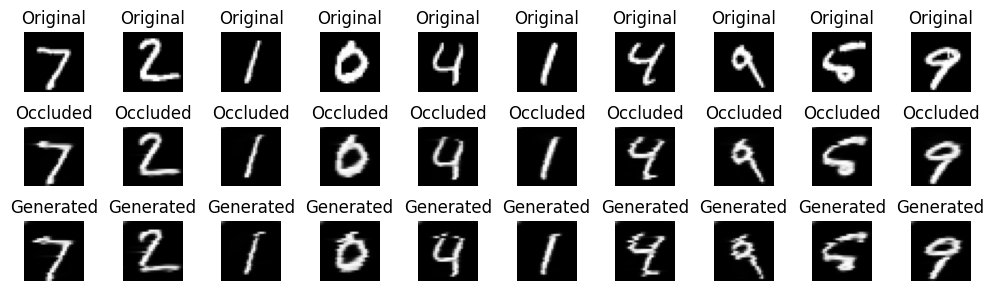

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(10, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:10], occluded_images[:10], generated_images[:10])

## Test more

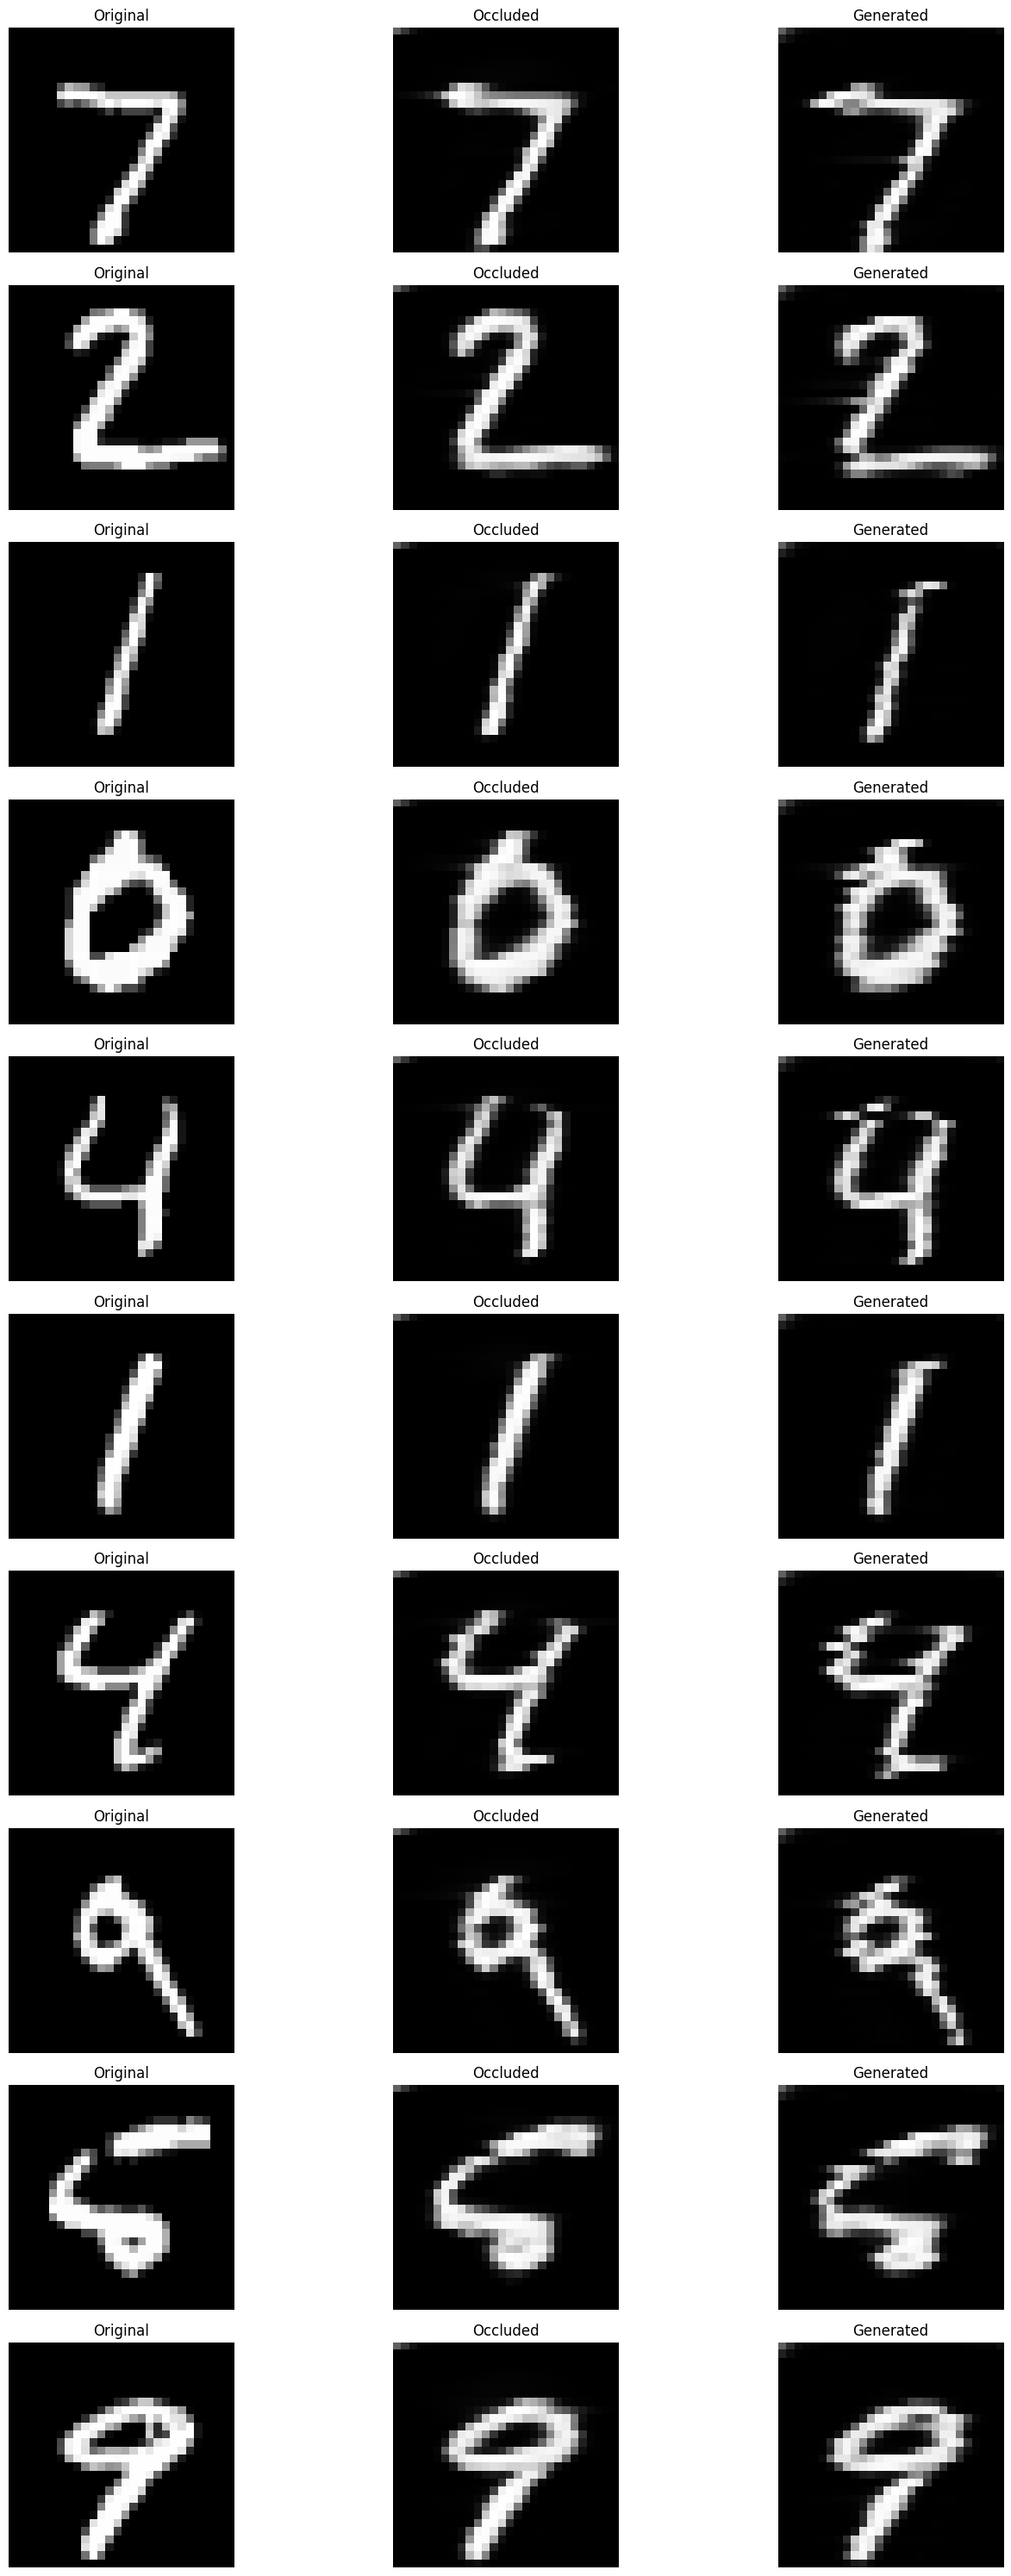

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=len(original), ncols=3, figsize=(15, 30))

    for i in range(len(original)):
        axes[i, 0].imshow(original[i].reshape(28, 28), cmap='gray', aspect='equal', extent=[0, 28, 0, 28])  # Set aspect to 'equal' to maintain correct proportions
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(occluded[i].reshape(28, 28), cmap='gray', aspect='equal', extent=[0, 28, 0, 28])  # Set aspect to 'equal' to maintain correct proportions
        axes[i, 1].set_title('Occluded')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(generated[i].reshape(28, 28), cmap='gray', aspect='equal', extent=[0, 28, 0, 28])  # Set aspect to 'equal' to maintain correct proportions
        axes[i, 2].set_title('Generated')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:10], occluded_images[:10], generated_images[:10])


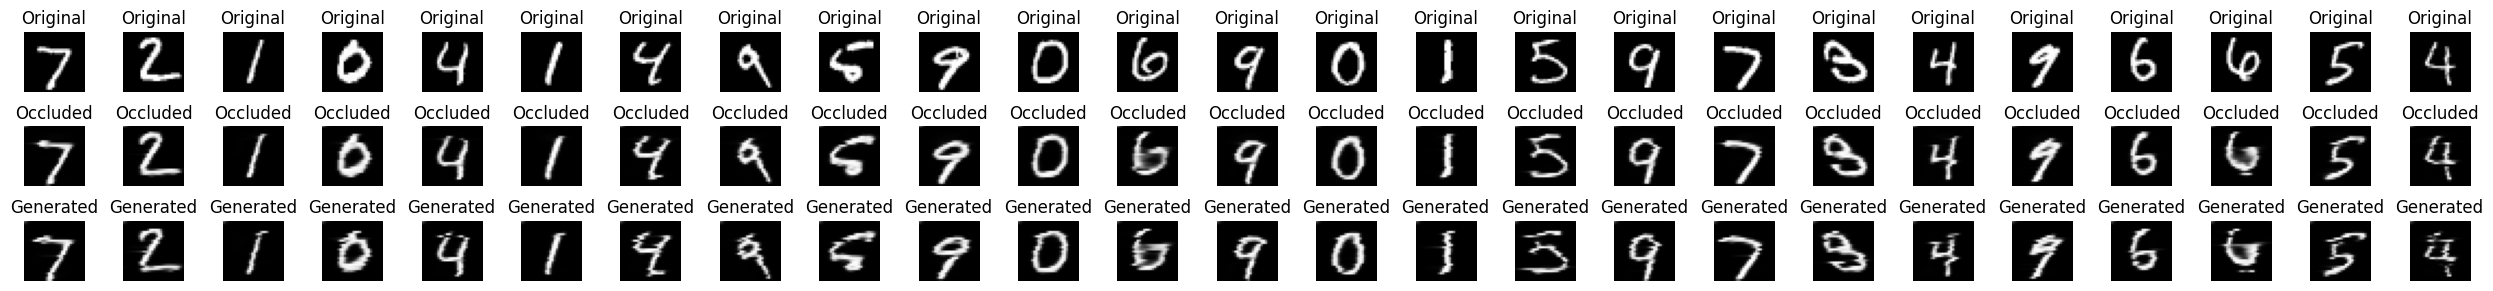

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

## More occlusions

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, Flatten, RepeatVector
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_pixel_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Reshape(target_shape=(input_shape[0]*input_shape[1], input_shape[2]), input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.add(Reshape(target_shape=input_shape))
    return model

In [ ]:
model = create_pixel_rnn_model(input_shape=(28, 28, 1), num_classes=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 784, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 784, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 784, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_2 (Dropout)         (None, 784, 128)          0

In [ ]:
model.fit(x_train, x_train, epochs=2, batch_size=128)

Epoch 1/2
469/469 [==============================] - 6577s 14s/step - loss: 0.2257 - accuracy: 0.8018
Epoch 2/2
469/469 [==============================] - 6503s 14s/step - loss: 0.1287 - accuracy: 0.8099


In [ ]:
import numpy as np

def occlude_images(x_test, occlusion_percentage):
    occluded_images = np.copy(x_test)

    # Determine the number of pixels to occlude based on the occlusion percentage
    num_pixels_to_occlude = int(occlusion_percentage * x_test.shape[1])

    # Loop through each image and occlude the specified number of pixels
    for i in range(len(occluded_images)):
        indices_to_occlude = np.random.choice(range(x_test.shape[1]), size=num_pixels_to_occlude, replace=False)
        occluded_images[i][indices_to_occlude] = 0  # Occlude pixels by setting them to zero

    return occluded_images

$50\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images)

313/313 [==============================] - 587s 2s/step


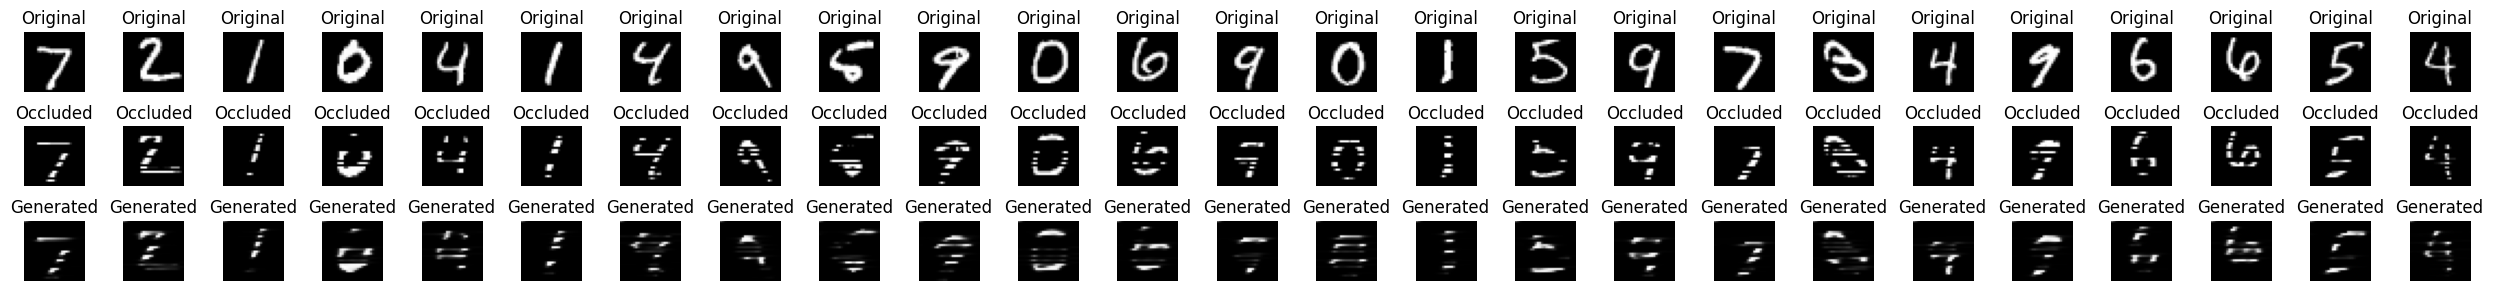

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$10\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.1)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 2s 2s/step


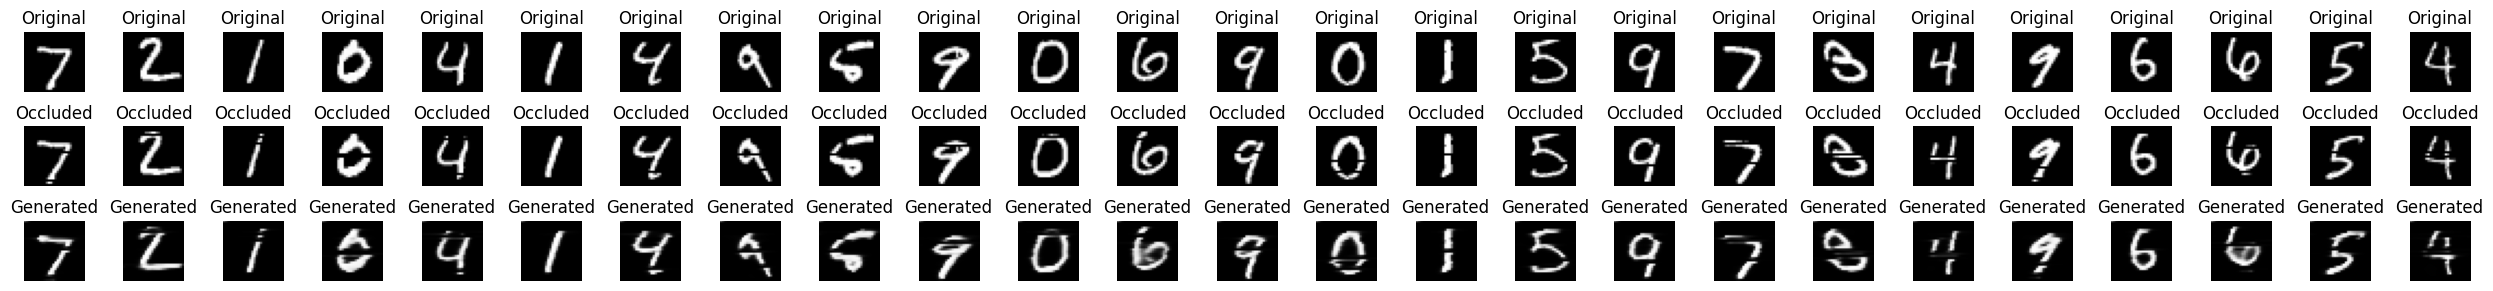

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$1\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.01)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 3s 3s/step


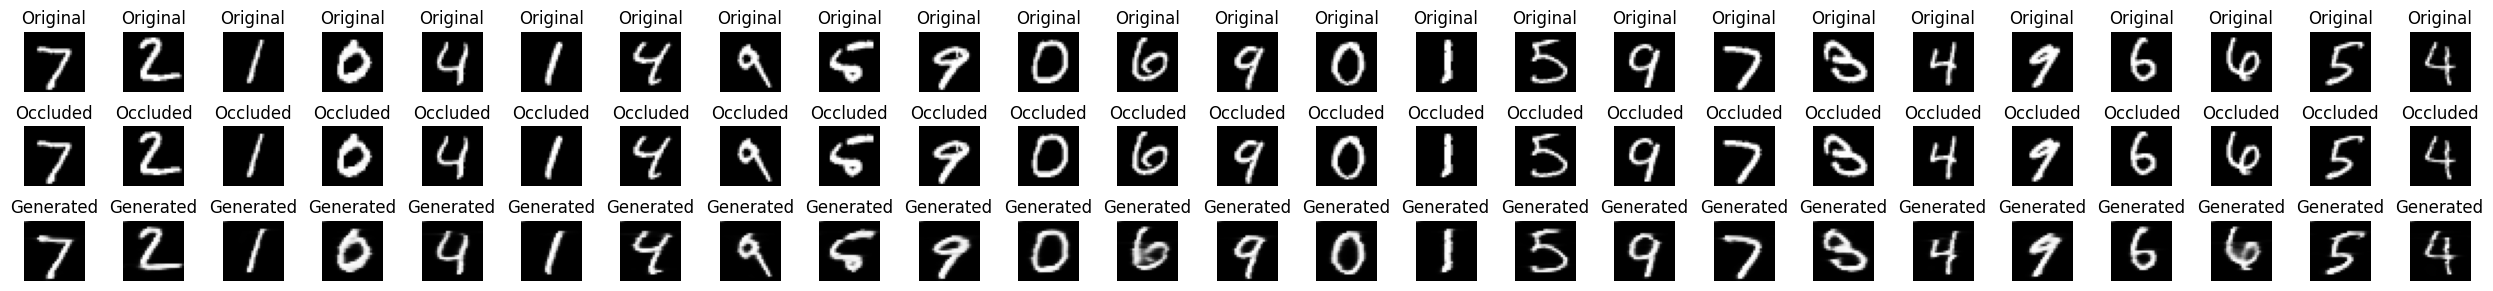

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.2)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 4s 4s/step


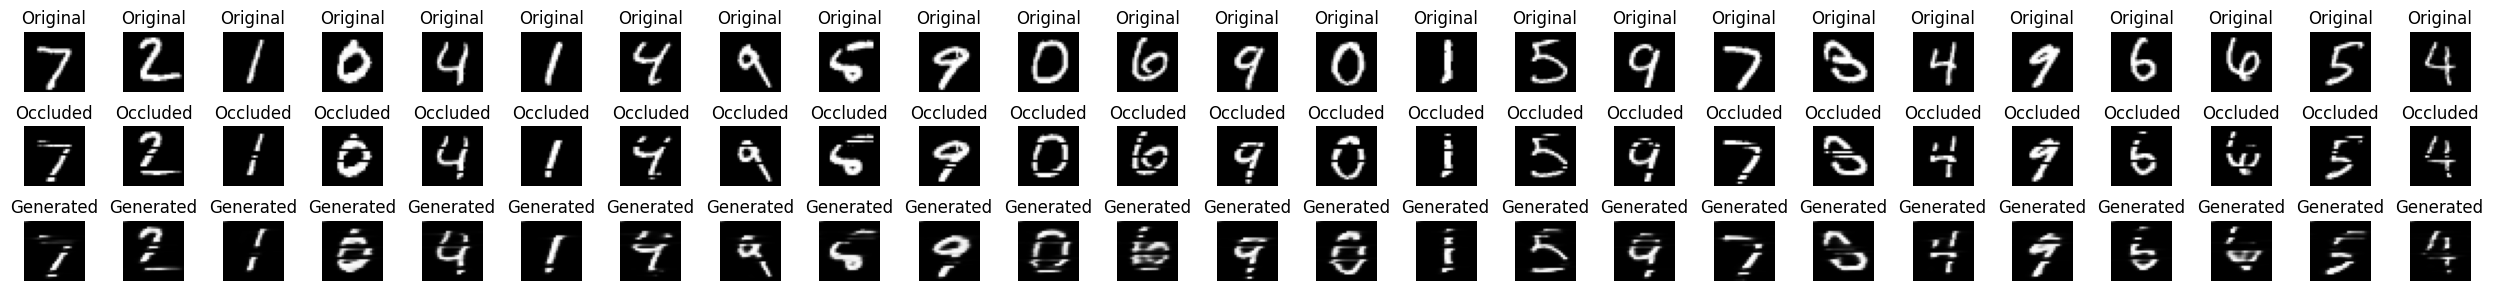

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

## More Layers

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, Flatten, RepeatVector
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_pixel_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Reshape(target_shape=(input_shape[0]*input_shape[1], input_shape[2]), input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.add(Reshape(target_shape=input_shape))
    return model

In [ ]:
model = create_pixel_rnn_model(input_shape=(28, 28, 1), num_classes=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 784, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 784, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 784, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_2 (Dropout)         (None, 784, 128)          0

In [ ]:
model.fit(x_train, x_train, epochs=2, batch_size=128)

Epoch 1/2
469/469 [==============================] - 11663s 25s/step - loss: 0.2766 - accuracy: 0.7991
Epoch 2/2
441/469 [===========================>..] - ETA: 12:44 - loss: 0.1431 - accuracy: 0.8085

In [ ]:
import numpy as np

def occlude_images(x_test, occlusion_percentage):
    occluded_images = np.copy(x_test)

    # Determine the number of pixels to occlude based on the occlusion percentage
    num_pixels_to_occlude = int(occlusion_percentage * x_test.shape[1])

    # Loop through each image and occlude the specified number of pixels
    for i in range(len(occluded_images)):
        indices_to_occlude = np.random.choice(range(x_test.shape[1]), size=num_pixels_to_occlude, replace=False)
        occluded_images[i][indices_to_occlude] = 0  # Occlude pixels by setting them to zero

    return occluded_images

$50\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

In [ ]:
generated_images = model.predict(occluded_images[:25])

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$10\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.1)
print("Shape of occluded dataset:", occluded_images.shape)

In [ ]:
generated_images = model.predict(occluded_images[:25])

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$1\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.01)
print("Shape of occluded dataset:", occluded_images.shape)

In [ ]:
generated_images = model.predict(occluded_images[:25])

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

### Single digit training


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, Flatten, RepeatVector
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[y_train==8, :, :]
x_test = x_test[y_test==8, :, :]

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_pixel_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Reshape(target_shape=(input_shape[0]*input_shape[1], input_shape[2]), input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.add(Reshape(target_shape=input_shape))
    return model

In [ ]:
model = create_pixel_rnn_model(input_shape=(28, 28, 1), num_classes=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 784, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 784, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 784, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 784, 128)          131584    
                                                                 
 dropout_2 (Dropout)         (None, 784, 128)          0

In [ ]:
model.fit(x_train, x_train, epochs=5, batch_size=128)

Epoch 1/5
46/46 [==============================] - 429s 9s/step - loss: 0.4101 - accuracy: 0.7670
Epoch 2/5
46/46 [==============================] - 392s 8s/step - loss: 0.2401 - accuracy: 0.7628
Epoch 3/5
46/46 [==============================] - 412s 9s/step - loss: 0.2271 - accuracy: 0.7624
Epoch 4/5
46/46 [==============================] - 421s 9s/step - loss: 0.2186 - accuracy: 0.7649
Epoch 5/5
46/46 [==============================] - 400s 9s/step - loss: 0.2024 - accuracy: 0.7690


In [ ]:
import numpy as np

def occlude_images(x_test, occlusion_percentage):
    occluded_images = np.copy(x_test)

    # Determine the number of pixels to occlude based on the occlusion percentage
    num_pixels_to_occlude = int(occlusion_percentage * x_test.shape[1])

    # Loop through each image and occlude the specified number of pixels
    for i in range(len(occluded_images)):
        indices_to_occlude = np.random.choice(range(x_test.shape[1]), size=num_pixels_to_occlude, replace=False)
        occluded_images[i][indices_to_occlude] = 0  # Occlude pixels by setting them to zero

    return occluded_images

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

$50\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 3s 3s/step


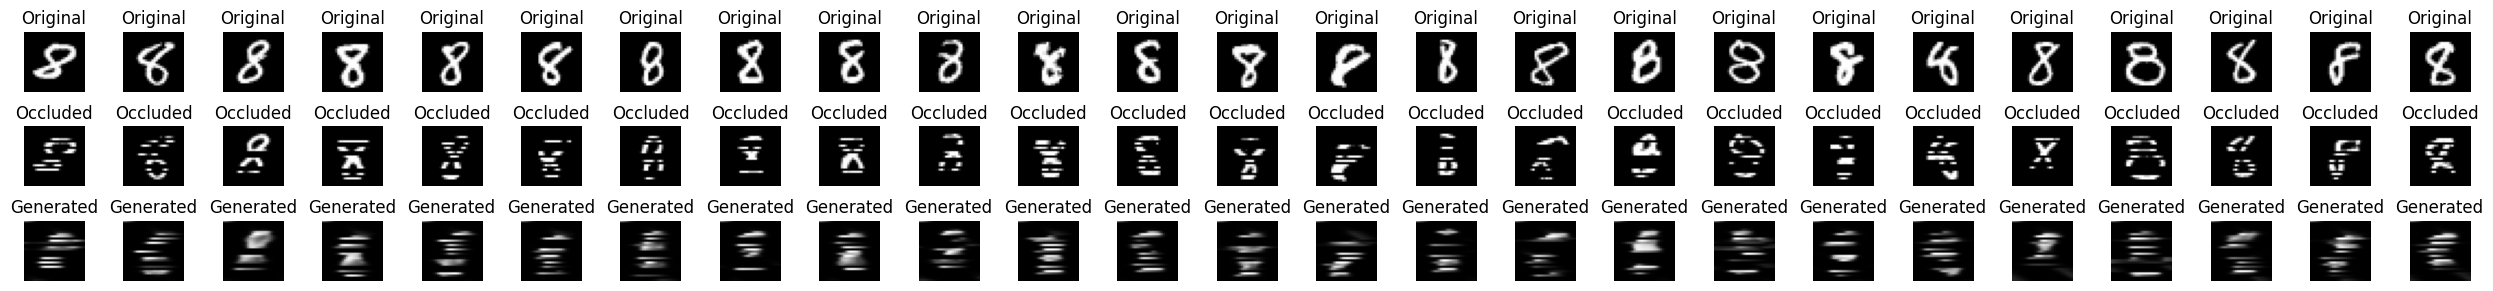

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$10\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.1)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 1s 971ms/step


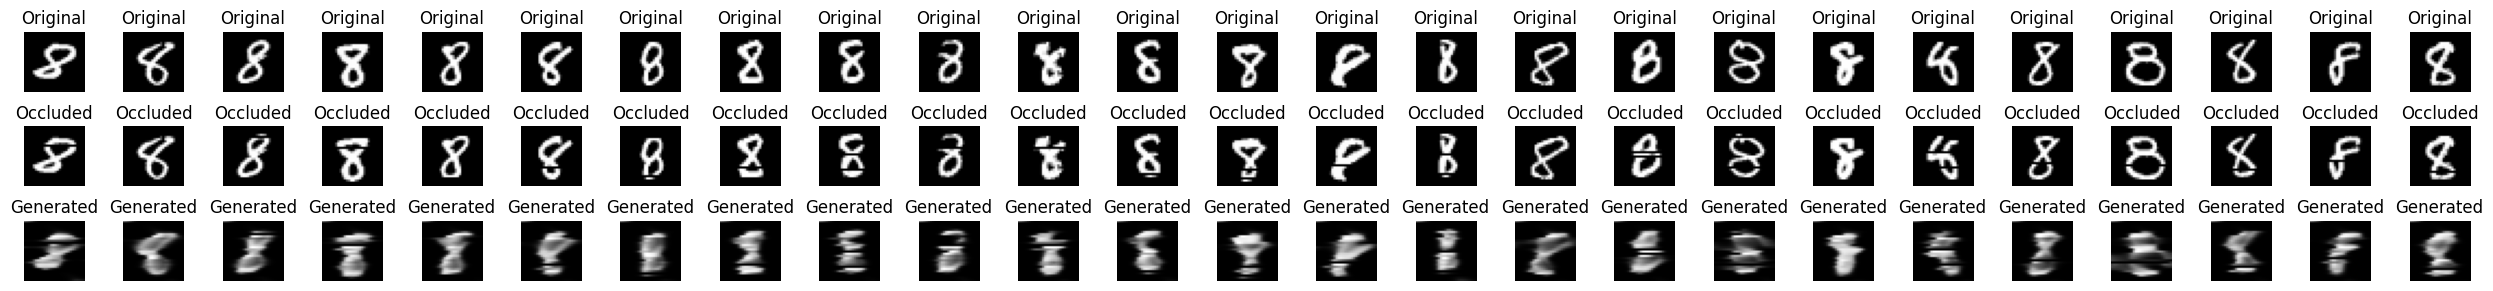

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$1\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.01)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 1s 1s/step


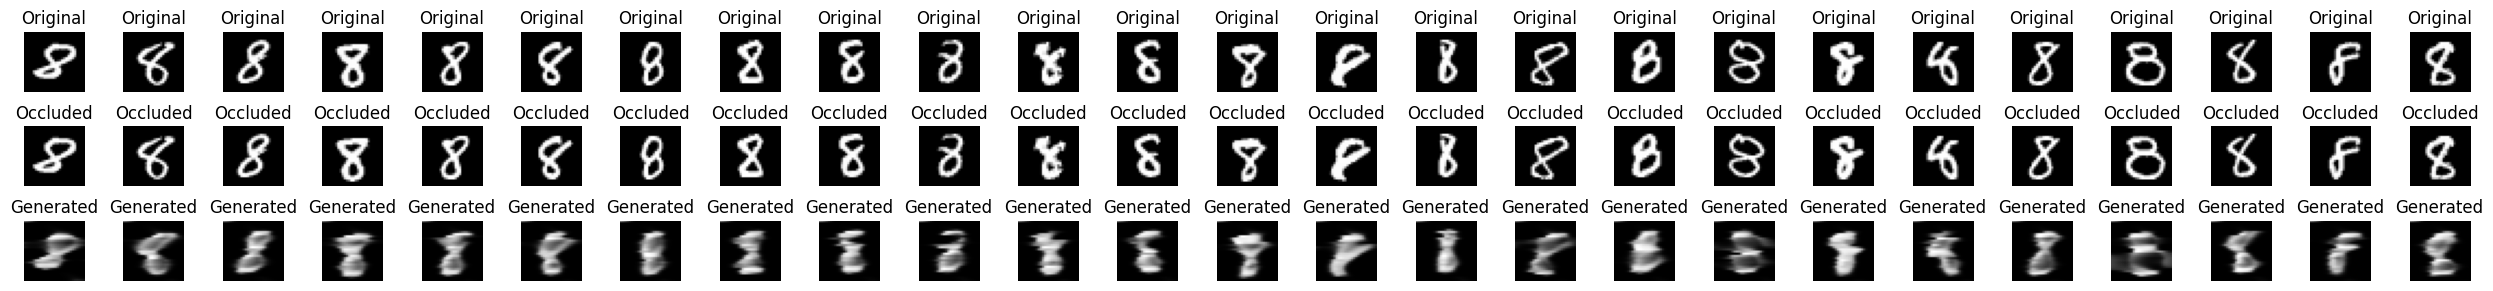

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

**More Epochs, Stiff Fit**

In [ ]:
model.fit(x_train, x_train, epochs=5, batch_size=128)

Epoch 1/5
46/46 [==============================] - 468s 10s/step - loss: 0.1451 - accuracy: 0.7812
Epoch 2/5
46/46 [==============================] - 401s 9s/step - loss: 0.0886 - accuracy: 0.7859
Epoch 3/5
46/46 [==============================] - 403s 9s/step - loss: 0.0837 - accuracy: 0.7860
Epoch 4/5
46/46 [==============================] - 437s 10s/step - loss: 0.0819 - accuracy: 0.7860
Epoch 5/5
46/46 [==============================] - 392s 9s/step - loss: 0.0807 - accuracy: 0.7860


$50\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 1s 986ms/step


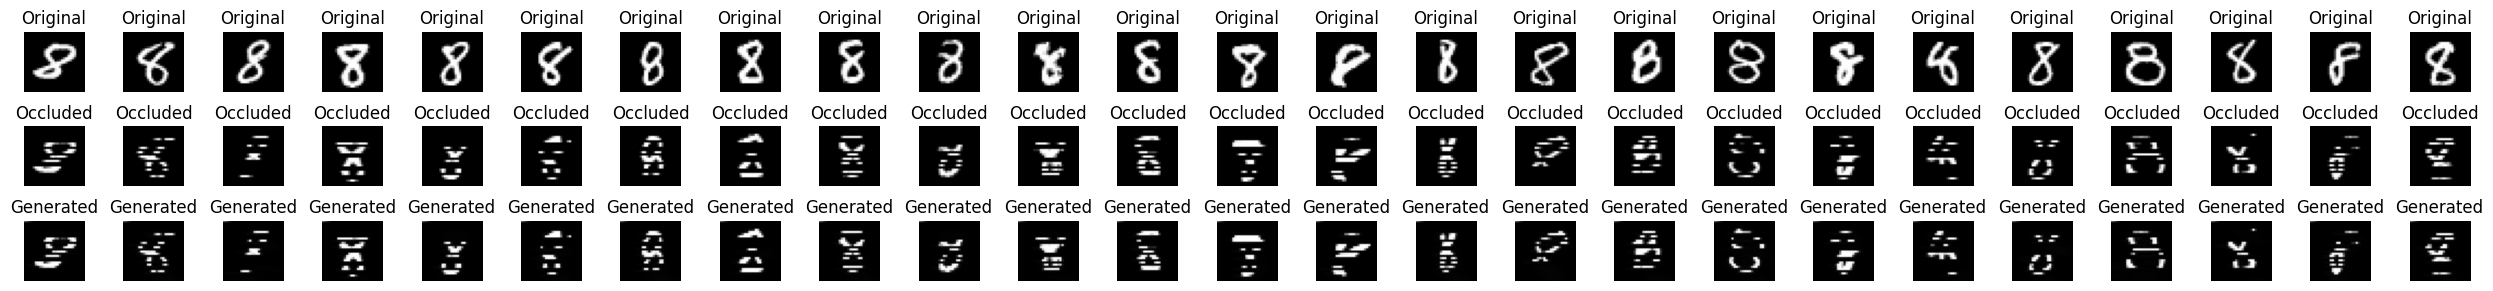

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$10\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.1)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 2s 2s/step


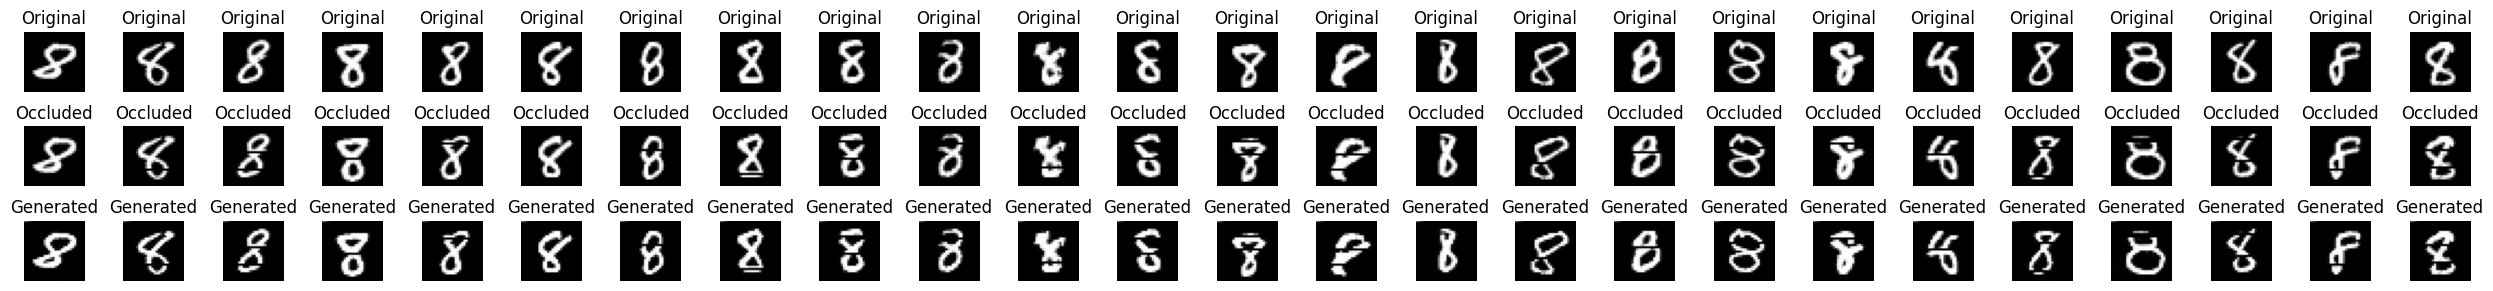

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

$1\%$ occlusion

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.01)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (974, 28, 28, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 2s 2s/step


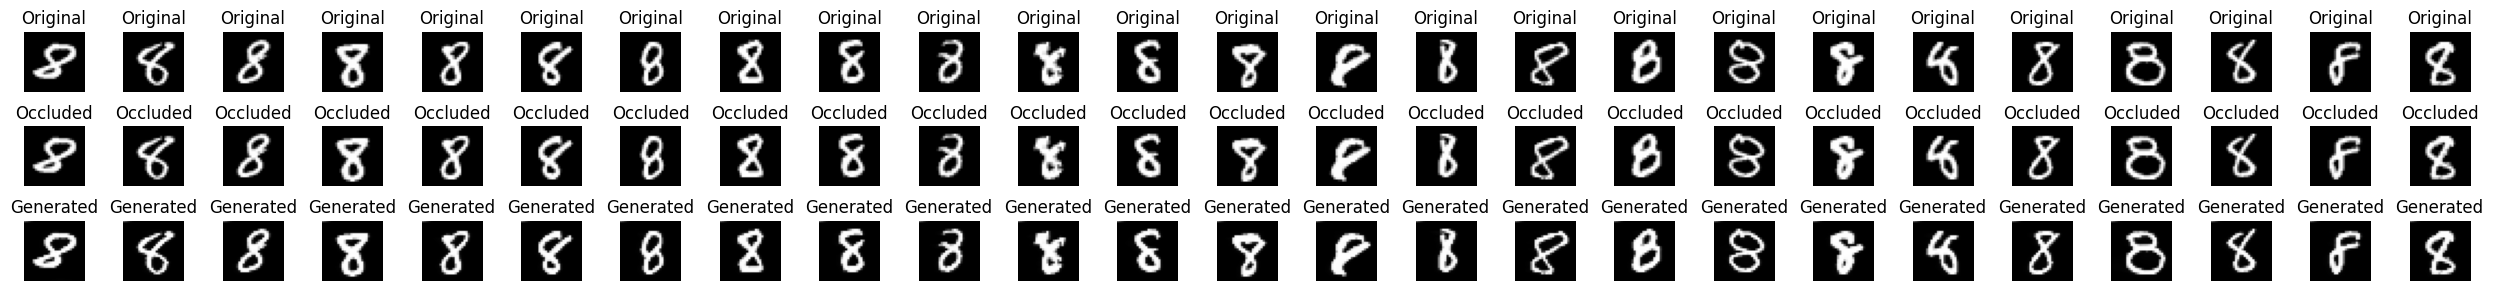

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
img_height, img_width = 28, 28  # Use a smaller image size for simplicity
num_channels = 1  # Number of image channels (grayscale for simplicity)
batch_size = 32  # Batch size for training
epochs = 10  # Number of epochs for training

# Load and preprocess the dataset (e.g., MNIST)
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, img_height, img_width, num_channels).astype('float32') / 255.0
test_images = test_images.reshape(-1, img_height, img_width, num_channels).astype('float32') / 255.0

# Add a time dimension (time steps = 1)
train_images = train_images[:, None, :, :, :]
test_images = test_images[:, None, :, :, :]

# Define the PixelRNN model
def create_pixelrnn_model():
    inputs = layers.Input(shape=(1, img_height, img_width, num_channels))

    # Initial Conv layer
    x = layers.TimeDistributed(layers.Conv2D(64, kernel_size=7, padding='same', activation='relu'))(inputs)

    # Row LSTM layers
    for _ in range(7):  # Stack of @7 LSTM layers for capturing dependencies
        x = layers.ConvLSTM2D(64, kernel_size=3, padding='same', return_sequences=True)(x)

    # Output Conv layer
    x = layers.TimeDistributed(layers.Conv2D(num_channels, kernel_size=1, activation='sigmoid'))(x)
    outputs = layers.Reshape((img_height, img_width, num_channels))(x)

    model = models.Model(inputs, outputs)
    return model

pixelrnn = create_pixelrnn_model()
pixelrnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
pixelrnn.fit(train_images, train_images, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_images))

Epoch 1/10
1875/1875 [==============================] - 270s 131ms/step - loss: 0.3475 - accuracy: 0.8088 - val_loss: 0.3399 - val_accuracy: 0.8072
Epoch 2/10
1875/1875 [==============================] - 245s 130ms/step - loss: 0.3360 - accuracy: 0.8088 - val_loss: 0.3367 - val_accuracy: 0.8072
Epoch 3/10
1875/1875 [==============================] - 252s 134ms/step - loss: 0.3317 - accuracy: 0.8088 - val_loss: 0.3311 - val_accuracy: 0.8072
Epoch 4/10
1875/1875 [==============================] - 252s 134ms/step - loss: 0.3270 - accuracy: 0.8088 - val_loss: 0.3279 - val_accuracy: 0.8072
Epoch 5/10
1875/1875 [==============================] - 252s 134ms/step - loss: 0.3248 - accuracy: 0.8086 - val_loss: 0.3267 - val_accuracy: 0.8069
Epoch 6/10
1875/1875 [==============================] - 252s 135ms/step - loss: 0.3236 - accuracy: 0.8082 - val_loss: 0.3257 - val_accuracy: 0.8068
Epoch 7/10
1875/1875 [==============================] - 253s 135ms/step - loss: 0.3228 - accuracy: 0.8080 - val_

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} Index out of range using input dim 4; input has only 4 dims [Op:StridedSlice] name: strided_slice/

In [ ]:
import numpy as np

def occlude_images(x_test, occlusion_percentage):
    occluded_images = np.copy(x_test)

    # Determine the number of pixels to occlude based on the occlusion percentage
    num_pixels_to_occlude = int(occlusion_percentage * x_test.shape[1])

    # Loop through each image and occlude the specified number of pixels
    for i in range(len(occluded_images)):
        indices_to_occlude = np.random.choice(range(x_test.shape[1]), size=num_pixels_to_occlude, replace=False)
        occluded_images[i][indices_to_occlude] = 0  # Occlude pixels by setting them to zero

    return occluded_images

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
occluded_images = occlude_images(test_images, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 1, 28, 28, 1)


In [ ]:
generated_images = pixelrnn.predict(occluded_images[:25])

1/1 [==============================] - 2s 2s/step


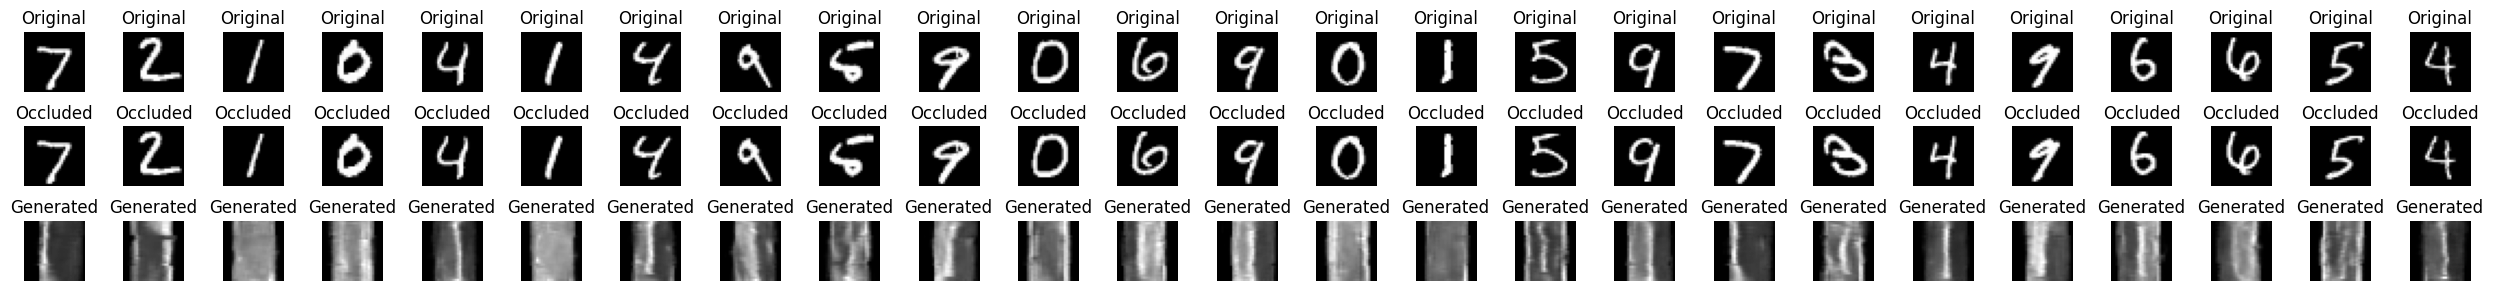

In [ ]:
# Plotting the images
plot_images(test_images[:25], occluded_images[:25], generated_images[:25])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, LSTM, Input, Reshape, Softmax
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension and pad to 32x32
x_train = np.pad(x_train[..., np.newaxis], ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test[..., np.newaxis], ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

# Define PixelRNN model
class PixelRNN(Model):
    def __init__(self, num_layers, hidden_dim):
        super(PixelRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        self.row_lstms = [LSTM(hidden_dim, return_sequences=True, recurrent_initializer='glorot_uniform') for _ in range(num_layers)]
        self.diagonal_bilstms = [LSTM(hidden_dim, return_sequences=True, go_backwards=True, recurrent_initializer='glorot_uniform') for _ in range(num_layers)]

        self.conv = Conv2D(1, (1, 1), padding='same', activation='sigmoid')

    def call(self, x):
        shape = tf.shape(x)
        batch_size = shape[0]
        height = shape[1]
        width = shape[2]
        channels = shape[3]

        x = tf.reshape(x, (batch_size, height * width, channels))  # Flatten spatial dimensions

        for i in range(self.num_layers):
            x = self.row_lstms[i](x)
            x = self.diagonal_bilstms[i](x)

        x = tf.reshape(x, (batch_size, height, width, self.hidden_dim))  # Reshape back to spatial dimensions
        x = self.conv(x)

        return x

# Instantiate and compile model
model = PixelRNN(num_layers=12, hidden_dim=128)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, x_train, epochs=1, batch_size=64, validation_data=(x_test, x_test))

# Evaluate model
loss, accuracy = model.evaluate(x_test, x_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Generate samples
samples = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(samples[i].reshape(32, 32), cmap='gray')
    plt.show()

252/938 [=======>......................] - ETA: 10:40 - loss: 0.3296 - accuracy: 0.8534

313/313 [==============================] - 95s 302ms/step - loss: 0.2839 - accuracy: 0.8524
Test Loss: 0.2838990092277527, Test Accuracy: 0.8524200320243835
1/1 [==============================] - 8s 8s/step


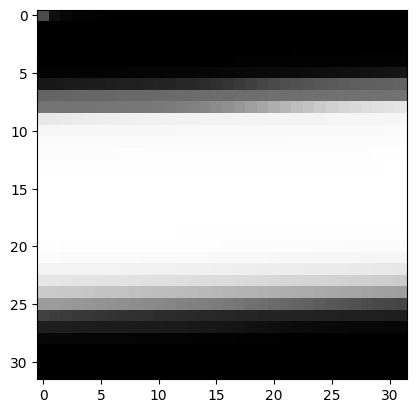

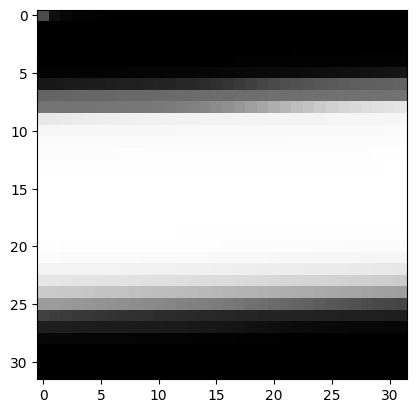

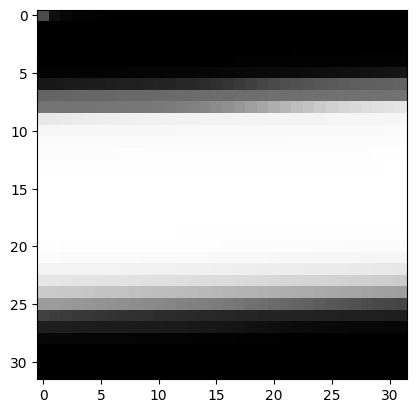

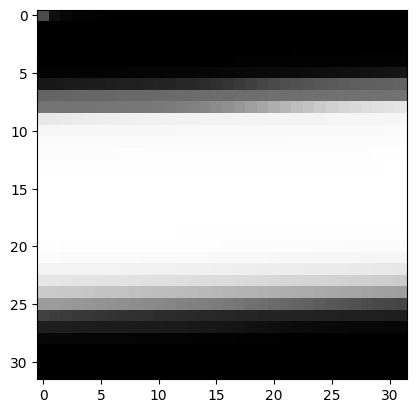

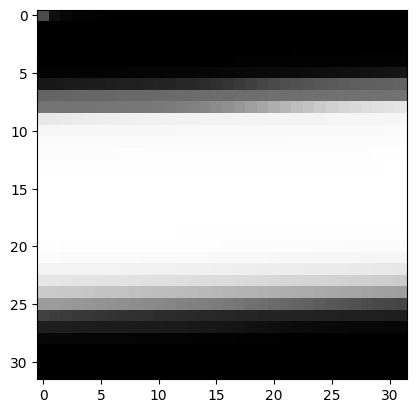

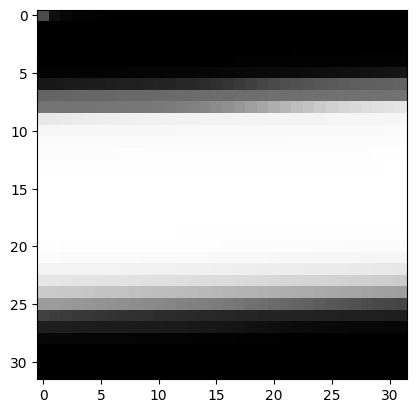

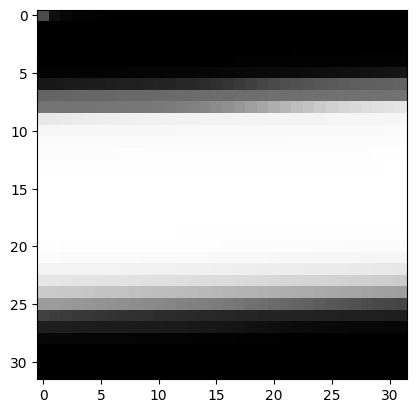

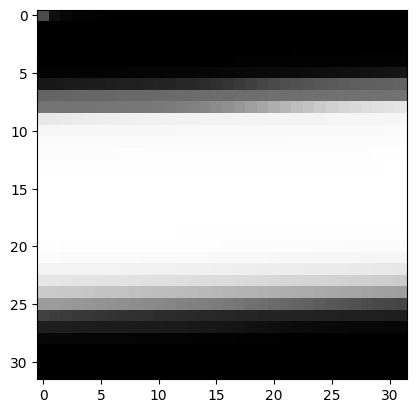

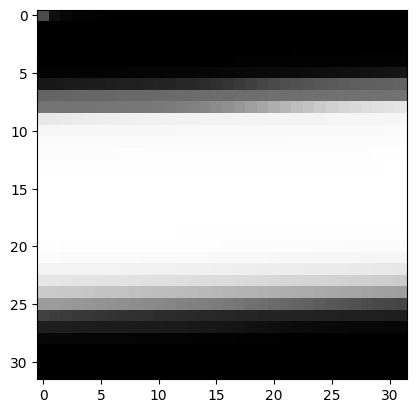

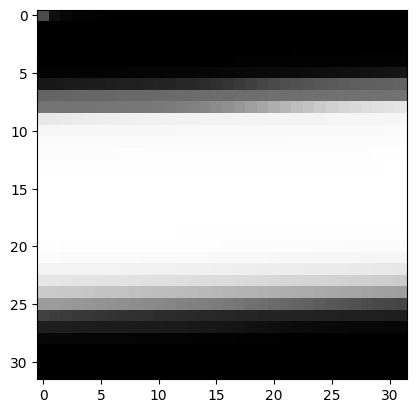

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, LSTM, Input, Reshape, Softmax
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension and pad to 32x32
x_train = np.pad(x_train[..., np.newaxis], ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test[..., np.newaxis], ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

# Define PixelRNN model
class PixelRNN(Model):
    def __init__(self, num_layers, hidden_dim):
        super(PixelRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        self.row_lstms = [LSTM(hidden_dim, return_sequences=True, recurrent_initializer='glorot_uniform') for _ in range(num_layers)]
        self.diagonal_bilstms = [LSTM(hidden_dim, return_sequences=True, go_backwards=True, recurrent_initializer='glorot_uniform') for _ in range(num_layers)]

        self.conv = Conv2D(1, (1, 1), padding='same', activation='sigmoid')

    def call(self, x):
        shape = tf.shape(x)
        batch_size = shape[0]
        height = shape[1]
        width = shape[2]
        channels = shape[3]

        x = tf.reshape(x, (batch_size, height * width, channels))  # Flatten spatial dimensions

        for i in range(self.num_layers):
            x = self.row_lstms[i](x)
            x = self.diagonal_bilstms[i](x)

        x = tf.reshape(x, (batch_size, height, width, self.hidden_dim))  # Reshape back to spatial dimensions
        x = self.conv(x)

        return x

# Instantiate and compile model
model = PixelRNN(num_layers=12, hidden_dim=128)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, x_train, epochs=1, batch_size=64, validation_data=(x_test, x_test))

# Evaluate model
loss, accuracy = model.evaluate(x_test, x_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Generate samples
samples = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(samples[i].reshape(32, 32), cmap='gray')
    plt.show()

In [ ]:
import numpy as np

def occlude_images(x_test, occlusion_percentage):
    occluded_images = np.copy(x_test)

    # Determine the number of pixels to occlude based on the occlusion percentage
    num_pixels_to_occlude = int(occlusion_percentage * x_test.shape[1])

    # Loop through each image and occlude the specified number of pixels
    for i in range(len(occluded_images)):
        indices_to_occlude = np.random.choice(range(x_test.shape[1]), size=num_pixels_to_occlude, replace=False)
        occluded_images[i][indices_to_occlude] = 0  # Occlude pixels by setting them to zero

    return occluded_images

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original, occluded, generated):
    fig, axes = plt.subplots(nrows=3, ncols=len(original), figsize=(25, 3))

    for i in range(len(original)):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(occluded[i].reshape(28, 28), cmap='gray')
        axes[1, i].set_title('Occluded')
        axes[1, i].axis('off')

        axes[2, i].imshow(generated[i].reshape(28, 28), cmap='gray')
        axes[2, i].set_title('Generated')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
occluded_images = occlude_images(x_test, occlusion_percentage=0.5)
print("Shape of occluded dataset:", occluded_images.shape)

Shape of occluded dataset: (10000, 32, 32, 1)


In [ ]:
generated_images = model.predict(occluded_images[:25])

1/1 [==============================] - 1s 630ms/step


ValueError: cannot reshape array of size 1024 into shape (28,28)

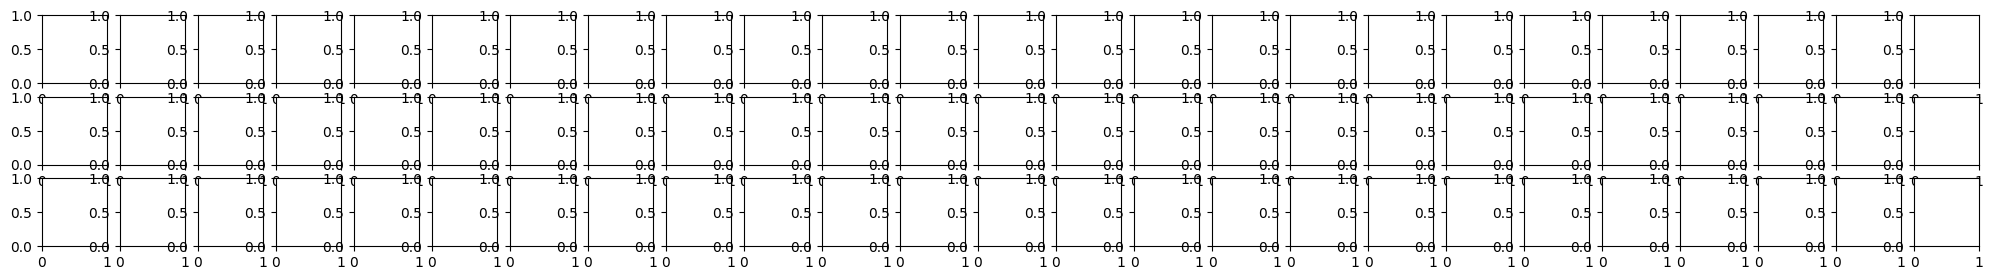

In [ ]:
# Plotting the images
plot_images(x_test[:25], occluded_images[:25], generated_images[:25])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape images
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Expand dimensions to add the time step dimension
train_images = np.expand_dims(train_images, axis=1)
test_images = np.expand_dims(test_images, axis=1)

# Convert to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:
class PixelRNN(tf.keras.Model):
    def __init__(self, lstm_layers=12, hidden_units=64):
        super(PixelRNN, self).__init__()
        self.lstm_layers = lstm_layers
        self.hidden_units = hidden_units
        self.row_lstm = [layers.ConvLSTM2D(filters=hidden_units, kernel_size=(3, 3), padding='same', return_sequences=True) for _ in range(lstm_layers)]
        self.diag_bilstm = [layers.ConvLSTM2D(filters=hidden_units, kernel_size=(2, 1), padding='same', return_sequences=True) for _ in range(lstm_layers)]
        self.residual_conv = layers.Conv2D(filters=hidden_units, kernel_size=(1, 1), padding='same', activation='relu')
        self.final_conv = layers.Conv2D(filters=256, kernel_size=(1, 1), padding='same', activation='softmax')

    def call(self, inputs):
        x = inputs
        for i in range(self.lstm_layers):
            x = self.row_lstm[i](x)
            x = self.diag_bilstm[i](x)
            if i % 2 == 0:
                x = x + self.residual_conv(x)
        x = self.final_conv(x)
        return x

In [ ]:
# Create model instance
model = PixelRNN()

# Compile model
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
model.fit(train_images, train_images, epochs=1, batch_size=64, validation_data=(test_images, test_images))

938/938 [==============================] - 790s 733ms/step - loss: 0.2077 - accuracy: 0.8088 - val_loss: 0.0439 - val_accuracy: 0.8072


In [ ]:
def occlude_half_image(images):
    occluded_images = images.copy()
    occluded_images[:, :, :, 14:, :] = 0
    return occluded_images

# Occlude half of the test images
print(test_images.shape)
occluded_test_images = occlude_half_image(test_images)

(10000, 1, 28, 28, 1)


1/1 [==============================] - 0s 82ms/step


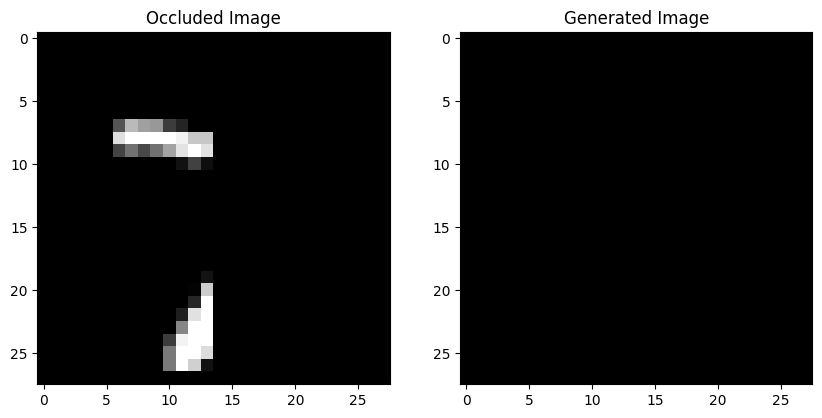

In [ ]:
def generate_image(model, occluded_image):
    prediction = model.predict(occluded_image)
    generated_image = np.argmax(prediction, axis=-1)
    return generated_image

# Example of generating an image
occluded_image = occluded_test_images[0:1]  # Select a single image
generated_image = generate_image(model, occluded_image)

# Plot the occluded and generated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Occluded Image')
plt.imshow(occluded_image[0, 0].squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Generated Image')
plt.imshow(generated_image[0, 0].squeeze(), cmap='gray')
plt.show()

In [ ]:
def evaluate_model(model, occluded_images, original_images):
    generated_images = model.predict(occluded_images)
    generated_images = np.argmax(generated_images, axis=-1)
    accuracy = np.mean(generated_images == original_images)
    return accuracy

# Example of evaluating the model
occluded_images = occluded_test_images[:100]
original_images = np.argmax(test_images[:100], axis=-1)
accuracy = evaluate_model(model, occluded_images, original_images)
print(f'Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 1s 214ms/step
Accuracy: 100.00%


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Hyperparameters
batch_size = 32
epochs = 10

# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Preprocess data (normalize and reshape)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# Define masking function for half occlusion
def create_mask(image, mask_ratio=0.5):
  """Creates a random mask that occludes half of the image pixels.

  Args:
      image: A 2D tensor representing the image.
      mask_ratio: The proportion of pixels to mask (default: 0.5).

  Returns:
      A 2D tensor with the same shape as the image, where 1 represents masked pixels.
  """
  height = image.shape[1]  # Extract height from first index
  width = image.shape[2]
  num_masked_pixels = int(height * width * mask_ratio)
  mask_locations = tf.random.uniform((num_masked_pixels,), minval=0, maxval=height * width, dtype=tf.int32)
  mask = tf.zeros_like(image[:, :, 0])
  mask = tf.tensor_scatter_nd(mask_locations[:, None], [[1]], shape=mask.shape)
  return mask

# Create training and validation datasets with masks
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, create_mask(x_train)))
train_dataset = train_dataset.shuffle(len(x_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((x_test, create_mask(x_test)))
val_dataset = val_dataset.batch(batch_size)


# Define PixelRNN model
class PixelRNN(keras.Model):
  def __init__(self):
    super(PixelRNN, self).__init__()
    self.lstm = layers.LSTM(128, return_sequences=True)
    self.conv = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")

  def call(self, inputs, mask=None):
    x, mask = inputs
    x = self.lstm(x, mask=mask)
    x = self.conv(x)
    return x

# Instantiate the model
model = PixelRNN()

# Define loss function (binary crossentropy)
loss_fn = keras.losses.BinaryCrossentropy()

# Define optimizer (Adam)
optimizer = keras.optimizers.Adam()

# Define training step function
@tf.function
def train_step(data):
  images, masks = data
  with tf.GradientTape() as tape:
    predictions = model((images, masks))
    loss = loss_fn(images[:, :, :, 0], predictions)  # Consider only first channel
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss

# Define validation step function (for evaluation)
@tf.function
def val_step(data):
  images, masks = data
  predictions = model((images, masks))
  loss = loss_fn(images[:, :, :, 0], predictions)
  return loss

# Train the model
train_losses = []
val_losses = []
for epoch in range(epochs):
  print(f"Epoch: {epoch+1}/{epochs}")
  for images, masks in train_dataset:
    loss = train_step((images, masks))
    train_losses.append(loss)
  for images, masks in val_dataset:
    loss = val_step((images, masks))
    val_losses.append(loss)
    print(f"Train Loss: {tf.reduce_mean(train_losses):.4f}, Val Loss: {tf.reduce_mean(val_losses):.4f}")
  train_losses = []
  val_losses = []

# Function to complete an image (replace with your desired image)
def complete_image(image, mask_ratio=0.5):
  """Completes a partially occluded image using the trained PixelRNN model.

  Args:
      image: A 2D tensor representing the partially occluded image.
      mask_ratio: The proportion of pixels that were masked (default: 0.5).

  Returns:
      A 2D tensor representing the completed image.
  """
  mask = create_mask(image, mask_ratio)
  completed_image = image.copy()
  for i in range(image.shape[1]):
    for j in range(image.shape[2]):
      if mask[i, j] == 1:
        # Predict the missing pixel value
        prediction = model(((completed_image[None, :, :, :], mask[None, :, :, :])), training=False)
        completed_image[0, i, j, 0] = prediction[0, i, j, 0]
  return completed_image

# Example usage (assuming you have a partially occluded image)
occluded_image = x_test[0]  # Replace with your occluded image
completed_image = complete_image(occluded_image)

# Visualize the completed image (using matplotlib or other libraries)
import matplotlib.pyplot as plt

plt.imshow(occluded_image[:, :, 0], cmap="gray")
plt.title("Occluded Image")
plt.show()

plt.imshow(completed_image[:, :, 0], cmap="gray")
plt.title("Completed Image")
plt.show()


AttributeError: module 'tensorflow' has no attribute 'tensor_scatter_nd'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the PixelRNN model
class PixelRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(PixelRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Input-to-state convolution
        self.input_conv = nn.Conv2d(1, 4*hidden_size, kernel_size=7, padding=3)

        # Diagonal BiLSTM layers
        self.lstm_layers = nn.ModuleList([
            DiagonalBiLSTM(hidden_size) for _ in range(num_layers)
        ])

        # Output layer
        self.output_conv = nn.Conv2d(hidden_size, 256, kernel_size=1)

    def forward(self, x):
        batch_size, _, height, width = x.size()

        # Apply input convolution
        x = self.input_conv(x)

        # Initialize hidden and cell states
        h = [torch.zeros(batch_size, self.hidden_size, height, width).to(x.device) for _ in range(self.num_layers)]
        c = [torch.zeros(batch_size, self.hidden_size, height, width).to(x.device) for _ in range(self.num_layers)]

        # Apply Diagonal BiLSTM layers
        for i, lstm in enumerate(self.lstm_layers):
            x, h[i], c[i] = lstm(x, h[i], c[i])

        # Apply output convolution
        x = self.output_conv(x)

        return x

class DiagonalBiLSTM(nn.Module):
    def __init__(self, hidden_size):
        super(DiagonalBiLSTM, self).__init__()
        self.hidden_size = hidden_size

        # Input-to-state convolution
        self.input_conv = nn.Conv2d(4*hidden_size, 4*hidden_size, kernel_size=1)

        # State-to-state convolution
        self.state_conv = nn.Conv2d(hidden_size, 4*hidden_size, kernel_size=(1,2), padding=(0,1))

    def forward(self, x, h, c):
        # Skew the input
        x = self.skew(x)
        h = self.skew(h)
        c = self.skew(c)

        # Apply convolutions
        gates = self.input_conv(x) + self.state_conv(h)

        # Split gates
        i, f, o, g = gates.chunk(4, dim=1)

        # Apply LSTM equations
        c = torch.sigmoid(f) * c + torch.sigmoid(i) * torch.tanh(g)
        h = torch.sigmoid(o) * torch.tanh(c)

        # Unskew the output
        return self.unskew(h), h, c

    def skew(self, x):
        b, c, h, w = x.size()
        x = torch.cat([x.new_zeros(b, c, h, 1), x], dim=3)
        x = x.view(b, c, h, w + 1)
        return x

    def unskew(self, x):
        return x[:, :, :, 1:]

# Load and preprocess MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(1, 28, 28))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model
model = PixelRNN(input_size=1, hidden_size=16, num_layers=7)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)

        # Create occluded images (upper half)
        occluded_data = data.clone()
        occluded_data[:, :, :14, :] = 0

        optimizer.zero_grad()
        output = model(occluded_data)
        loss = criterion(output.view(-1, 256), data.long().view(-1))
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

# Generate complete images from half-occluded inputs
model.eval()
with torch.no_grad():
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)
    data, _ = next(iter(test_loader))
    data = data.to(device)

    occluded_data = data.clone()
    occluded_data[:, :, :14, :] = 0

    generated = model(occluded_data)
    generated = torch.argmax(generated, dim=1).float() / 255.0

    # Visualize results
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(16):
        row, col = i // 4, i % 4
        axes[row, col].imshow(generated[i].cpu().squeeze(), cmap='gray')
        axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4583965.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 57308.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1273092.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5816955.35it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



RuntimeError: The size of tensor a (29) must match the size of tensor b (30) at non-singleton dimension 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape images to 4D tensors and normalize pixel values
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Create data loaders
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# Define PixelRNN model
class PixelRNN(keras.Model):
    def __init__(self, num_classes):
        super(PixelRNN, self).__init__()
        self.lstm = layers.LSTM(units=128, return_sequences=True)
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.lstm(x)
        x = self.fc(x[:, -1, :])  # Use only the last time step
        return x

# Initialize PixelRNN model
model = PixelRNN(num_classes=10)

# Define loss function and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(lr=0.001)

# Train the model
for epoch in range(10):
    for images, labels in train_dataset:
        images = images[:, :, :, :14]  # Use only the left half of the image
        images = images[:, :, :, tf.newaxis]  # Add a channel dimension
        with tf.GradientTape() as tape:
            outputs = model(images)
            loss = loss_fn(labels, outputs)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Test the model
test_loss = 0
correct = 0
for images, labels in test_dataset:
    images = images[:, :, :, :14]  # Use only the left half of the image
    images = images[:, :, :, tf.newaxis]  # Add a channel dimension
    outputs = model(images)
    loss = loss_fn(labels, outputs)
    test_loss += loss
    predictions = tf.argmax(outputs, axis=1)
    correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32))

accuracy = correct / len(test_labels)
print('Test Loss: {:.3f}, Accuracy: {:.2f}%'.format(test_loss / len(test_labels), accuracy * 100))


11490434/11490434 [==============================] - 2s 0us/step


ValueError: Exception encountered when calling layer 'pixel_rnn' (type PixelRNN).

Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (32, 28, 28, 1, 1)

Call arguments received by layer 'pixel_rnn' (type PixelRNN):
  • x=tf.Tensor(shape=(32, 28, 28, 1, 1), dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train[:10000]  # Consider using the full dataset if possible
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adding a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Generate partial images
def generate_partial_images(images, window_size=10):
    partial_images = []
    for image in images:
        h, w, _ = image.shape
        start_h = np.random.randint(0, h - window_size)
        start_w = np.random.randint(0, w - window_size)
        partial_image = image.copy()
        partial_image[start_h:start_h+window_size, start_w:start_w+window_size] = 0  # Hide a square portion
        partial_images.append(partial_image)
    return np.array(partial_images)

window_size = 10
partial_x_train = generate_partial_images(x_train, window_size)
partial_x_test = generate_partial_images(x_test, window_size)

# PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Sigmoid for pixel-wise probabilities
model = tf.keras.Model(inputs, output)

# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Binary crossentropy for pixel-wise comparison
model.summary()

# Training on partial images
model.fit(partial_x_train, x_train, epochs=10, batch_size=32, validation_data=(partial_x_test, x_test))  # Increased epochs and added validation

# Generating and displaying images
n = 5
test_images = partial_x_test[:n]
generated_images = model.predict(test_images)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856 

1/1 [==============================] - 0s 19ms/step


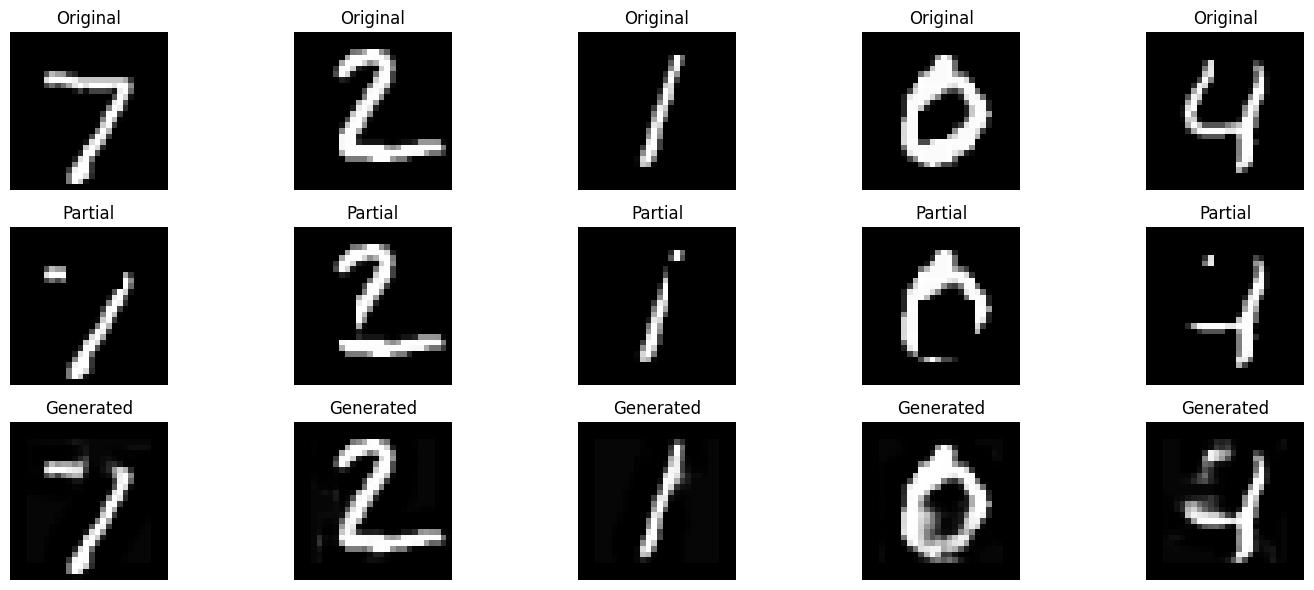

In [ ]:
# Generating and displaying images
n = 5
test_images = partial_x_test[:n]
generated_images = model.predict(test_images)

# Display the original partial images and the actual test images
plt.figure(figsize=(15, 6))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(3, n, i + n +  1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Partial")
    plt.axis('off')

# Generate and display the model's predictions for partial images
for i in range(n):
    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated")
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 256)       1024      
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 256)       5900

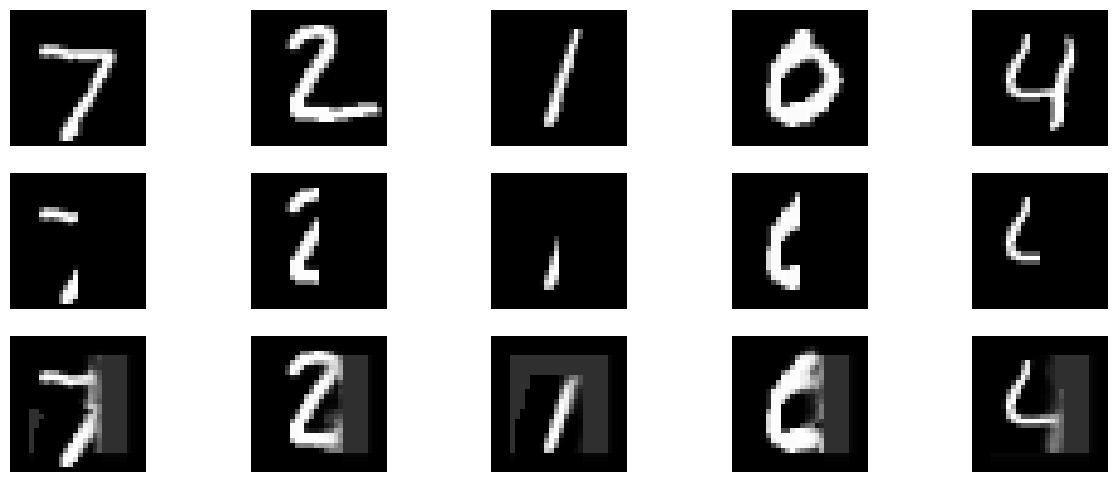

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Adding a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Generate half occluded images from complete images for training and testing
def generate_half_occluded_images(images):
    half_occluded_images = []
    for image in images:
        half_occluded_image = image.copy()
        half_occluded_image[:, 14:] = 0  # Occlude the right half
        half_occluded_images.append(half_occluded_image)
    return np.array(half_occluded_images)

half_occluded_x_train = generate_half_occluded_images(x_train)
half_occluded_x_test = generate_half_occluded_images(x_test)

# More complex PixelRNN model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
model = tf.keras.Model(inputs, output)

# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Training on half occluded images (consider increasing epochs)
model.fit(half_occluded_x_train, x_train, epochs=20, validation_data=(half_occluded_x_test, x_test))

# Generating and displaying images
n = 5  # number of images to generate
test_images = half_occluded_x_test[:n]
generated_images = model.predict(test_images)

# Display the original half occluded images and the actual test images
plt.figure(figsize=(15, 6))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + n +  1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')


# Generate and display the model's predictions for half occluded images
for i in range(n):
    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST data and preprocess
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [ ]:
class SequentialPixelProcessor(tf.keras.layers.Layer):
    def __init__(self, num_hidden, **kwargs):
        super(SequentialPixelProcessor, self).__init__(**kwargs)
        self.num_hidden = num_hidden
        self.core_cell = tf.keras.layers.LSTMCell(num_hidden)

    def build(self, input_shape):
        self.built = True

    def call(self, pixel_sequence, initial_states):
        batch_size = tf.shape(pixel_sequence)[0]
        processed_pixels = []
        hidden_state, cell_state = initial_states

        # Create a mask to prevent seeing future pixels (IMPORTANT!)
        mask = tf.linalg.band_part(tf.ones((28, 28)), -1, 0)
        mask = tf.tile(tf.expand_dims(mask, 0), [batch_size, 1, 1])

        for i in range(tf.shape(pixel_sequence)[1]):
            current_pixel = pixel_sequence[:, i, :]
            cell_input = tf.concat([current_pixel, hidden_state], axis=-1)

            # Apply the mask to the hidden state
            masked_hidden_state = hidden_state * tf.expand_dims(mask[:, i, :], -1)

            pixel_output, (new_hidden, new_cell) = self.core_cell(
                cell_input, states=(masked_hidden_state, cell_state)
            )
            hidden_state, cell_state = new_hidden, new_cell
            processed_pixels.append(pixel_output)

        return tf.stack(processed_pixels, axis=1), (hidden_state, cell_state)

In [ ]:
class BiDirectionalPixelProcessor(tf.keras.layers.Layer):
    def __init__(self, num_hidden, **kwargs):
        super(BiDirectionalPixelProcessor, self).__init__(**kwargs)
        self.num_hidden = num_hidden
        self.forward_lstm = tf.keras.layers.LSTMCell(num_hidden)
        self.backward_lstm = tf.keras.layers.LSTMCell(num_hidden)

    def build(self, input_shape):
        self.built = True

    def call(self, pixel_features, initial_states):
        batch_size = tf.shape(pixel_features)[0]
        sequence_length = tf.shape(pixel_features)[1]

        # Initialize states for both directions
        forward_hidden, forward_cell = initial_states[0]
        backward_hidden, backward_cell = initial_states[1]

        # Process pixels in both directions
        forward_outputs = []
        backward_outputs = []

        # Forward Pass (with masking)
        for i in range(sequence_length):
            # Create a mask to hide future pixels in the forward pass
            forward_mask = tf.linalg.band_part(tf.ones((sequence_length, sequence_length)), -1, i - sequence_length)
            forward_mask = tf.tile(tf.expand_dims(forward_mask, 0), [batch_size, 1, 1])

            # Apply the mask to the hidden state
            masked_forward_hidden = forward_hidden * tf.expand_dims(forward_mask[:, i, :], -1)

            forward_output, (new_forward_hidden, new_forward_cell) = self.forward_lstm(
                pixel_features[:, i, :], states=(masked_forward_hidden, forward_cell)
            )
            forward_outputs.append(forward_output)
            forward_hidden, forward_cell = new_forward_hidden, new_forward_cell

        # Backward Pass (with masking)
        for i in reversed(range(sequence_length)):
            # Create a mask to hide future pixels in the backward pass
            backward_mask = tf.linalg.band_part(tf.ones((sequence_length, sequence_length)), 0, i + 1)
            backward_mask = tf.tile(tf.expand_dims(backward_mask, 0), [batch_size, 1, 1])

            # Apply the mask to the hidden state
            masked_backward_hidden = backward_hidden * tf.expand_dims(backward_mask[:, i, :], -1)

            backward_output, (new_backward_hidden, new_backward_cell) = self.backward_lstm(
                pixel_features[:, i, :], states=(masked_backward_hidden, backward_cell)
            )
            backward_outputs.insert(0, backward_output) # Insert at beginning for correct order
            backward_hidden, backward_cell = new_backward_hidden, new_backward_cell

        # Combine forward and backward outputs
        forward_outputs = tf.stack(forward_outputs, axis=1)
        backward_outputs = tf.stack(backward_outputs, axis=1)
        combined_outputs = tf.concat([forward_outputs, backward_outputs], axis=-1)

        # Return the processed features and final states
        return combined_outputs, [(forward_hidden, forward_cell), (backward_hidden, backward_cell)]

In [ ]:
class MaskedConv2D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, **kwargs):
        super(MaskedConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.conv_layer = tf.keras.layers.Conv2D(
            filters, kernel_size, padding='same', kernel_initializer='glorot_uniform'
        )

    def build(self, input_shape):
        # Create a mask for the convolution kernel
        mask = np.ones(self.kernel_size + (input_shape[-1], self.filters))
        center_row = self.kernel_size[0] // 2
        center_col = self.kernel_size[1] // 2

        # Mask future pixels (bottom-right quadrant)
        mask[center_row:, center_col:, :, :] = 0.0

        # Mask the center pixel if the kernel size is odd
        if self.kernel_size[0] % 2 == 1:
            mask[center_row, center_col, :, :] = 0.0

        self.mask = tf.constant(mask, dtype=tf.float32)
        self.built = True

    def call(self, inputs):
        # Apply the mask to the convolution kernel
        masked_kernel = self.conv_layer.kernel * self.mask

        # Perform convolution with the masked kernel
        outputs = tf.nn.conv2d(
            inputs, masked_kernel, strides=1, padding='SAME'
        )

        # Add bias and apply activation (if needed)
        if self.conv_layer.use_bias:
            outputs = outputs + self.conv_layer.bias

        # You can add an activation function here if desired (e.g., ReLU)
        # outputs = tf.nn.relu(outputs)

        return outputs

In [ ]:
def build_pixelrnn(input_shape=(28, 28, 1), num_hidden_row=128, num_hidden_diag=256, num_layers_row=2, num_layers_diag=2):
    inputs = tf.keras.Input(shape=input_shape)

    # Row LSTM layers
    initial_states_row = [
        tf.zeros((tf.shape(inputs)[0], num_hidden_row)),
        tf.zeros((tf.shape(inputs)[0], num_hidden_row))
    ]
    x, _ = SequentialPixelProcessor(num_hidden_row)(inputs, initial_states=initial_states_row)
    for _ in range(num_layers_row - 1):
        x, _ = SequentialPixelProcessor(num_hidden_row)(x, initial_states=initial_states_row)

    # Diagonal BiLSTM layers
    initial_states_diag_forward = [
        tf.zeros((tf.shape(inputs)[0], num_hidden_diag)),
        tf.zeros((tf.shape(inputs)[0], num_hidden_diag))
    ]
    initial_states_diag_backward = [
        tf.zeros((tf.shape(inputs)[0], num_hidden_diag)),
        tf.zeros((tf.shape(inputs)[0], num_hidden_diag))
    ]
    x, _ = BiDirectionalPixelProcessor(num_hidden_diag)(x, initial_states=[initial_states_diag_forward, initial_states_diag_backward])
    for _ in range(num_layers_diag - 1):
        x, _ = BiDirectionalPixelProcessor(num_hidden_diag)(x, initial_states=[initial_states_diag_forward, initial_states_diag_backward])

    # Masked Convolution layers
    x = MaskedConv2D(128, (3, 3))(x)
    x = MaskedConv2D(64, (3, 3))(x)  # Add more MaskedConv2D layers with varying filter sizes

    # Output layer
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
model = build_pixelrnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

ValueError: Exception encountered when calling layer "sequential_pixel_processor" (type SequentialPixelProcessor).

in user code:

    File "<ipython-input-7-061ada89a8ea>", line 21, in call  *
        cell_input = tf.concat([current_pixel, hidden_state], axis=-1)

    ValueError: Shape must be rank 3 but is rank 2 for '{{node sequential_pixel_processor/while/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](sequential_pixel_processor/while/strided_slice, sequential_pixel_processor/while/Placeholder_2, sequential_pixel_processor/while/concat/axis)' with input shapes: [?,28,1], [?,128], [].


Call arguments received by layer "sequential_pixel_processor" (type SequentialPixelProcessor):
  • pixel_sequence=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • initial_states=['tf.Tensor(shape=(None, 128), dtype=float32)', 'tf.Tensor(shape=(None, 128), dtype=float32)']

In [ ]:
history = model.fit(
    x_train, x_train,
    epochs=20,  # Adjust the number of epochs
    batch_size=128,  # Adjust the batch size
    validation_data=(x_test, x_test)
)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, x_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate images from the test set
n_images = 10
generated_images = model.predict(x_test[:n_images])

# Generate occluded images (assuming you have a function for this)
occluded_images = generate_half_occluded_images(x_test[:n_images])

# Plot original, occluded, and generated images
plt.figure(figsize=(15, 6))
for i in range(n_images):
    # Original Image
    plt.subplot(3, n_images, i + 1)
    plt.imshow(x_test[i, :, :, 0], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Occluded Image
    plt.subplot(3, n_images, i + 1 + n_images)
    plt.imshow(occluded_images[i, :, :, 0], cmap='gray')
    plt.title("Occluded")
    plt.axis('off')

    # Generated Image
    plt.subplot(3, n_images, i + 1 + 2 * n_images)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.title("Generated")
    plt.axis('off')

plt.show()

# PixelRNN start a new

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.activations import relu
from tensorflow.keras.models import Sequential

import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from packaging.version import parse as parse_version

AssertionError: Please install TensorFlow version 2.3.1 or older. Your current version is 2.15.0.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                              split=['test', 'test'],
                              shuffle_files=True,
                              as_supervised=True,
                              with_info=True)

#fig = tfds.show_examples(ds_info, ds_train)

def binarize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.math.round(image/255.)
    return image, tf.cast(image, tf.int32)

ds_train = ds_train.map(binarize)
ds_train = ds_train.cache() # put dataset into memory
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(64)
ds_test = ds_test.map(binarize).batch(64).cache().prefetch(64)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class MaskedConv2D(layers.Layer):
    def __init__(self, mask_type, kernel=5, filters=1):
        super(MaskedConv2D, self).__init__()
        self.kernel = kernel
        self.filters = filters
        self.mask_type = mask_type

    def build(self, input_shape):

        self.w = self.add_weight(shape=[self.kernel,
                                        self.kernel,
                                        input_shape[-1],
                                        self.filters],
                                initializer='glorot_normal',
                                trainable=True)

        self.b = self.add_weight(shape=(self.filters,),
                                initializer='zeros',
                                trainable=True)
        # Create Mask
        mask = np.ones(self.kernel**2, dtype=np.float32)
        center = len(mask)//2
        mask[center+1:] = 0
        if self.mask_type == 'A':
            mask[center] = 0

        mask = mask.reshape((self.kernel, self.kernel, 1, 1))

        self.mask = tf.constant(mask, dtype='float32')

    def call(self, inputs):
        # mask the convolution
        masked_w = tf.math.multiply(self.w, self.mask)

        # perform conv2d using low level API
        output = tf.nn.conv2d(inputs, masked_w, 1, "SAME") + self.b

        return tf.nn.relu(output)

class ResidualBlock(layers.Layer):
    def __init__(self, h=32):
        super(ResidualBlock, self).__init__()

        self.forward = Sequential([MaskedConv2D('B', kernel=1, filters=h),
                                   MaskedConv2D('B', kernel=3, filters=h),
                                   MaskedConv2D('B', kernel=1, filters=2*h)])
    def call(self, inputs):
        x = self.forward(inputs)
        return x + inputs

def SimplePixelCnn(hidden_features=64,
                   output_features=64,
                   resblocks_num=7):

    inputs  = layers.Input(shape=[28,28,1])
    x = inputs

    x = MaskedConv2D('A',kernel=7, filters=2*hidden_features)(x)

    for _ in range(resblocks_num):
        x = ResidualBlock(hidden_features)(x)

    x = layers.Conv2D(output_features, (1,1), padding='same', activation='relu')(x)
    x = layers.Conv2D(1, (1,1), padding='same', activation='sigmoid')(x)

    return tf.keras.Model(inputs=inputs, outputs=x, name='PixelCnn')

pixel_cnn = SimplePixelCnn()
pixel_cnn.summary()

Model: "PixelCnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 masked_conv2d (MaskedConv2  (None, 28, 28, 128)       6400      
 D)                                                              
                                                                 
 residual_block (ResidualBl  (None, 28, 28, 128)       53504     
 ock)                                                            
                                                                 
 residual_block_1 (Residual  (None, 28, 28, 128)       53504     
 Block)                                                          
                                                                 
 residual_block_2 (Residual  (None, 28, 28, 128)       53504     
 Block)                                                   

In [ ]:
pixel_cnn.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.losses.BinaryCrossentropy()])

pixel_cnn.fit(ds_train, epochs = 50, validation_data=ds_test)

Epoch 1/50
157/157 [==============================] - 25s 92ms/step - loss: 0.1502 - binary_crossentropy: 0.1501 - val_loss: 0.1187 - val_binary_crossentropy: 0.1188
Epoch 2/50
157/157 [==============================] - 12s 75ms/step - loss: 0.1052 - binary_crossentropy: 0.1052 - val_loss: 0.1121 - val_binary_crossentropy: 0.1121
Epoch 3/50
157/157 [==============================] - 12s 76ms/step - loss: 0.1014 - binary_crossentropy: 0.1014 - val_loss: 0.1016 - val_binary_crossentropy: 0.1016
Epoch 4/50
157/157 [==============================] - 12s 76ms/step - loss: 0.0994 - binary_crossentropy: 0.0994 - val_loss: 0.0979 - val_binary_crossentropy: 0.0979
Epoch 5/50
157/157 [==============================] - 12s 76ms/step - loss: 0.0979 - binary_crossentropy: 0.0979 - val_loss: 0.0984 - val_binary_crossentropy: 0.0984
Epoch 6/50
157/157 [==============================] - 12s 76ms/step - loss: 0.0967 - binary_crossentropy: 0.0967 - val_loss: 0.0952 - val_binary_crossentropy: 0.0952
Epoc

In [ ]:
grid_row = 5
grid_col = 5
batch = grid_row * grid_col
h = w = 28
images = np.ones((batch,h,w,1), dtype=np.float32)

for row in range(h):

    for col in range(w):

        prob = pixel_cnn.predict(images)[:,row,col,0]

        pixel_samples = tf.random.categorical(tf.math.log(np.stack([1-prob, prob],1)), 1)

        images[:,row,col,0] = tf.reshape(pixel_samples,[batch])

1/1 [==============================] - 0s 22ms/step


TypeError: Figure.tight_layout() takes 1 positional argument but 2 positional arguments (and 2 keyword-only arguments) were given

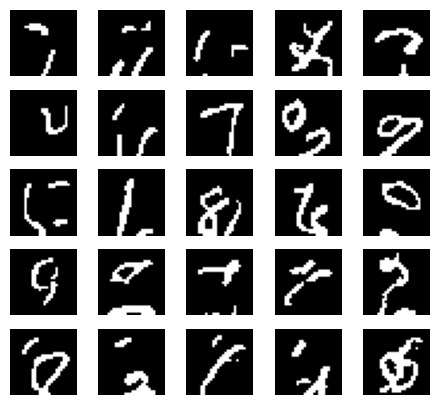

In [ ]:
# Display
f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col*1.1,grid_row))

i = 0
for row in range(grid_row):
    for col in range(grid_col):
        axarr[row,col].imshow(images[i,:,:,0], cmap='gray')
        axarr[row,col].axis('off')
        i += 1
f.tight_layout(0.1, h_pad=0.2, w_pad=0.1)
plt.show()